In [2]:
#import libraries

import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white", color_codes=True)
import matplotlib.pylab as plt
from pylab import rcParams
import matplotlib.pylab as plt
import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls
py.init_notebook_mode(connected=True)

%matplotlib inline
import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

In [3]:
#ABOUT THE DATA
#Source: https://www.kaggle.com/datasets/ohinhaque/ocd-patient-dataset-demographics-and-clinical-data
#Title: ‘OCD Patient Dataset: Demographics & Clinical Data’
#Data on 1500 OCD-diagnosed individuals, covering diverse parameters, offering detailed demographic and clinical profiles.

In [ ]:
#PURPOSE OF THE ANALYSIS: provide information for a market access case
#Provide insights into prevalent OCD medications by examining prescription trends and demographic patterns.
#Get a sense of market needs and areas where a new medication can excel.

In [ ]:
#QUESTIONS TO ANALYSE
#1. Competitors analysis: Determine the most frequently prescribed medications for OCD within the dataset.
#2. Patient profiling: Identify and analyse specific patient groups based on factors such as demographic, clinical, and socioeconomic information, to understand potential benefits within each group.
#3. Predisposition for medication use: Explore any specific conditions or factors within the OCD cases that might significantly influence the need for medication, guiding potential directions for a new medication's market positioning.

In [4]:
df = pd.read_csv("ocd_patient_dataset.csv") 
df.head()

,Patient ID,Age,Gender,Ethnicity,Marital Status,Education Level,OCD Diagnosis Date,Duration of Symptoms (months),Previous Diagnoses,Family History of OCD,Obsession Type,Compulsion Type,Y-BOCS Score (Obsessions),Y-BOCS Score (Compulsions),Depression Diagnosis,Anxiety Diagnosis,Medications
0,1018,32,Female,African,Single,Some College,2016-07-15,203,MDD,No,Harm-related,Checking,17,10,Yes,Yes,SNRI
1,2406,69,Male,African,Divorced,Some College,2017-04-28,180,None,Yes,Harm-related,Washing,21,25,Yes,Yes,SSRI
2,1188,57,Male,Hispanic,Divorced,College Degree,2018-02-02,173,MDD,No,Contamination,Checking,3,4,No,No,Benzodiazepine
3,6200,27,Female,Hispanic,Married,College Degree,2014-08-25,126,PTSD,Yes,Symmetry,Washing,14,28,Yes,Yes,SSRI
4,5824,56,Female,Hispanic,Married,High School,2022-02-20,168,PTSD,Yes,Hoarding,Ordering,39,18,No,No,None


In [5]:
df.shape

(1500, 17)

In [6]:
#data types and formats, nan values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Patient ID                     1500 non-null   int64 
 1   Age                            1500 non-null   int64 
 2   Gender                         1500 non-null   object
 3   Ethnicity                      1500 non-null   object
 4   Marital Status                 1500 non-null   object
 5   Education Level                1500 non-null   object
 6   OCD Diagnosis Date             1500 non-null   object
 7   Duration of Symptoms (months)  1500 non-null   int64 
 8   Previous Diagnoses             1500 non-null   object
 9   Family History of OCD          1500 non-null   object
 10  Obsession Type                 1500 non-null   object
 11  Compulsion Type                1500 non-null   object
 12  Y-BOCS Score (Obsessions)      1500 non-null   int64 
 13  Y-B

In [7]:
#tranform date into date time format
df['OCD Diagnosis Date'] = pd.to_datetime(df['OCD Diagnosis Date'], format='%Y-%m-%d')

In [8]:
#tranform column family history into 0 and 1 for yes and no, also for depression and anxiety
# Changin yes and no to 0 and 1 values
family_history_map = {'Yes': 1, 'No': 0}
df['Family History of OCD'] = df['Family History of OCD'].map(family_history_map)

In [9]:
# For Depression Diagnosis
depression_map = {'Yes': 1, 'No': 0}
df['Depression Diagnosis'] = df['Depression Diagnosis'].map(depression_map)

# For Anxiety Diagnosis
anxiety_map = {'Yes': 1, 'No': 0}
df['Anxiety Diagnosis'] = df['Anxiety Diagnosis'].map(anxiety_map)

In [10]:
#searching for duplicates
duplicates = df[df.duplicated('Patient ID', keep=False)]
sorted_duplicates = duplicates.sort_values('Patient ID', ascending=True)
sorted_duplicates

,Patient ID,Age,Gender,Ethnicity,Marital Status,Education Level,OCD Diagnosis Date,Duration of Symptoms (months),Previous Diagnoses,Family History of OCD,Obsession Type,Compulsion Type,Y-BOCS Score (Obsessions),Y-BOCS Score (Compulsions),Depression Diagnosis,Anxiety Diagnosis,Medications
0,1018,32,Female,African,Single,Some College,2016-07-15,203,MDD,0,Harm-related,Checking,17,10,1,1,SNRI
209,1018,73,Female,Caucasian,Single,College Degree,2015-12-05,150,Panic Disorder,1,Symmetry,Counting,9,15,0,0,SNRI
162,1190,23,Male,Caucasian,Divorced,Graduate Degree,2022-03-12,198,None,1,Symmetry,Washing,20,7,0,1,SSRI
1189,1190,35,Female,African,Married,College Degree,2014-02-16,233,Panic Disorder,0,Religious,Ordering,7,12,0,0,None
436,1645,23,Male,Caucasian,Married,College Degree,2013-12-29,91,PTSD,0,Symmetry,Checking,12,1,1,1,SSRI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,9814,70,Male,Hispanic,Single,Some College,2016-09-10,102,None,1,Harm-related,Praying,18,22,1,0,SSRI
484,9877,49,Female,African,Single,High School,2020-09-24,56,MDD,0,Contamination,Counting,5,37,1,0,Benzodiazepine
808,9877,52,Female,Hispanic,Single,Some College,2021-02-21,9,GAD,0,Contamination,Praying,13,24,0,0,SNRI
871,9995,23,Male,African,Single,Graduate Degree,2021-08-05,133,Panic Disorder,0,Symmetry,Counting,19,26,0,0,Benzodiazepine


In [11]:
# Dropping the 'Patient ID' column
df.drop('Patient ID', axis=1, inplace=True)
df

,Age,Gender,Ethnicity,Marital Status,Education Level,OCD Diagnosis Date,Duration of Symptoms (months),Previous Diagnoses,Family History of OCD,Obsession Type,Compulsion Type,Y-BOCS Score (Obsessions),Y-BOCS Score (Compulsions),Depression Diagnosis,Anxiety Diagnosis,Medications
0,32,Female,African,Single,Some College,2016-07-15,203,MDD,0,Harm-related,Checking,17,10,1,1,SNRI
1,69,Male,African,Divorced,Some College,2017-04-28,180,None,1,Harm-related,Washing,21,25,1,1,SSRI
2,57,Male,Hispanic,Divorced,College Degree,2018-02-02,173,MDD,0,Contamination,Checking,3,4,0,0,Benzodiazepine
3,27,Female,Hispanic,Married,College Degree,2014-08-25,126,PTSD,1,Symmetry,Washing,14,28,1,1,SSRI
4,56,Female,Hispanic,Married,High School,2022-02-20,168,PTSD,1,Hoarding,Ordering,39,18,0,0,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,38,Male,Hispanic,Divorced,College Degree,2019-01-10,53,MDD,0,Contamination,Washing,21,33,1,1,SSRI
1496,19,Female,Hispanic,Divorced,Graduate Degree,2022-09-14,160,GAD,1,Hoarding,Praying,25,16,1,1,SSRI
1497,40,Male,Asian,Married,Some College,2018-03-13,100,None,1,Contamination,Counting,2,15,1,1,Benzodiazepine
1498,37,Female,Caucasian,Married,Some College,2018-04-14,210,GAD,1,Contamination,Washing,16,7,1,0,Benzodiazepine


In [12]:
# Define the age ranges
bins = [10, 20, 30, 40, 50, 60, 70, 80]
labels = ['11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80']

# Create a new column for age ranges
df['Age Range'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

df

,Age,Gender,Ethnicity,Marital Status,Education Level,OCD Diagnosis Date,Duration of Symptoms (months),Previous Diagnoses,Family History of OCD,Obsession Type,Compulsion Type,Y-BOCS Score (Obsessions),Y-BOCS Score (Compulsions),Depression Diagnosis,Anxiety Diagnosis,Medications,Age Range
0,32,Female,African,Single,Some College,2016-07-15,203,MDD,0,Harm-related,Checking,17,10,1,1,SNRI,31-40
1,69,Male,African,Divorced,Some College,2017-04-28,180,None,1,Harm-related,Washing,21,25,1,1,SSRI,61-70
2,57,Male,Hispanic,Divorced,College Degree,2018-02-02,173,MDD,0,Contamination,Checking,3,4,0,0,Benzodiazepine,51-60
3,27,Female,Hispanic,Married,College Degree,2014-08-25,126,PTSD,1,Symmetry,Washing,14,28,1,1,SSRI,21-30
4,56,Female,Hispanic,Married,High School,2022-02-20,168,PTSD,1,Hoarding,Ordering,39,18,0,0,None,51-60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,38,Male,Hispanic,Divorced,College Degree,2019-01-10,53,MDD,0,Contamination,Washing,21,33,1,1,SSRI,31-40
1496,19,Female,Hispanic,Divorced,Graduate Degree,2022-09-14,160,GAD,1,Hoarding,Praying,25,16,1,1,SSRI,11-20
1497,40,Male,Asian,Married,Some College,2018-03-13,100,None,1,Contamination,Counting,2,15,1,1,Benzodiazepine,41-50
1498,37,Female,Caucasian,Married,Some College,2018-04-14,210,GAD,1,Contamination,Washing,16,7,1,0,Benzodiazepine,31-40


In [13]:
#statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1500.0,46.781333,16.830321,18.0,32.0,47.0,61.0,75.0
Duration of Symptoms (months),1500.0,121.745333,67.404610,6.0,64.0,121.0,178.0,240.0
Family History of OCD,1500.0,0.506667,0.500122,0.0,0.0,1.0,1.0,1.0
Y-BOCS Score (Obsessions),1500.0,20.048000,11.823884,0.0,10.0,20.0,31.0,40.0
Y-BOCS Score (Compulsions),1500.0,19.626000,11.782870,0.0,9.0,20.0,29.0,40.0
Depression Diagnosis,1500.0,0.514667,0.499952,0.0,0.0,1.0,1.0,1.0
Anxiety Diagnosis,1500.0,0.500667,0.500166,0.0,0.0,1.0,1.0,1.0


In [14]:
#statistics
columns_to_mode = ['Age', 'Age Range', 'Duration of Symptoms (months)', 'Family History of OCD',
                   'Y-BOCS Score (Obsessions)', 'Y-BOCS Score (Compulsions)',
                   'Depression Diagnosis', 'Anxiety Diagnosis']
for column in columns_to_mode:
    mode_value = df[column].mode()[0]
    print(f"Mode for '{column}': {mode_value}")

Mode for 'Age': 70
Mode for 'Age Range': 51-60
Mode for 'Duration of Symptoms (months)': 158
Mode for 'Family History of OCD': 1
Mode for 'Y-BOCS Score (Obsessions)': 37
Mode for 'Y-BOCS Score (Compulsions)': 21
Mode for 'Depression Diagnosis': 1
Mode for 'Anxiety Diagnosis': 1


In [15]:
#column values
exclude_columns = ['OCD Diagnosis Date', 'Duration of Symptoms (months)', 'Age', 'Y-BOCS Score (Obsessions)', 'Y-BOCS Score (Compulsions)']

for column in df.columns:
    if column not in exclude_columns:
        unique_values = df[column].unique()
        print(f"Unique values for column '{column}': {unique_values}")

Unique values for column 'Gender': ['Female' 'Male']
Unique values for column 'Ethnicity': ['African' 'Hispanic' 'Asian' 'Caucasian']
Unique values for column 'Marital Status': ['Single' 'Divorced' 'Married']
Unique values for column 'Education Level': ['Some College' 'College Degree' 'High School' 'Graduate Degree']
Unique values for column 'Previous Diagnoses': ['MDD' 'None' 'PTSD' 'GAD' 'Panic Disorder']
Unique values for column 'Family History of OCD': [0 1]
Unique values for column 'Obsession Type': ['Harm-related' 'Contamination' 'Symmetry' 'Hoarding' 'Religious']
Unique values for column 'Compulsion Type': ['Checking' 'Washing' 'Ordering' 'Praying' 'Counting']
Unique values for column 'Depression Diagnosis': [1 0]
Unique values for column 'Anxiety Diagnosis': [1 0]
Unique values for column 'Medications': ['SNRI' 'SSRI' 'Benzodiazepine' 'None']
Unique values for column 'Age Range': ['31-40', '61-70', '51-60', '21-30', '71-80', '41-50', '11-20']
Categories (7, object): ['11-20' < 

In [16]:
unique_years = df['OCD Diagnosis Date'].dt.year.unique()
unique_years

array([2016, 2017, 2018, 2014, 2022, 2015, 2019, 2020, 2021, 2013],
      dtype=int64)

In [17]:
# 'OCD Diagnosis Date' column extract only the year
df['OCD Diagnosis Year'] = pd.to_datetime(df['OCD Diagnosis Date']).dt.year

# Drop the original 'OCD Diagnosis Date' column
df.drop('OCD Diagnosis Date', axis=1, inplace=True)

In [18]:
df

,Age,Gender,Ethnicity,Marital Status,Education Level,Duration of Symptoms (months),Previous Diagnoses,Family History of OCD,Obsession Type,Compulsion Type,Y-BOCS Score (Obsessions),Y-BOCS Score (Compulsions),Depression Diagnosis,Anxiety Diagnosis,Medications,Age Range,OCD Diagnosis Year
0,32,Female,African,Single,Some College,203,MDD,0,Harm-related,Checking,17,10,1,1,SNRI,31-40,2016
1,69,Male,African,Divorced,Some College,180,None,1,Harm-related,Washing,21,25,1,1,SSRI,61-70,2017
2,57,Male,Hispanic,Divorced,College Degree,173,MDD,0,Contamination,Checking,3,4,0,0,Benzodiazepine,51-60,2018
3,27,Female,Hispanic,Married,College Degree,126,PTSD,1,Symmetry,Washing,14,28,1,1,SSRI,21-30,2014
4,56,Female,Hispanic,Married,High School,168,PTSD,1,Hoarding,Ordering,39,18,0,0,None,51-60,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,38,Male,Hispanic,Divorced,College Degree,53,MDD,0,Contamination,Washing,21,33,1,1,SSRI,31-40,2019
1496,19,Female,Hispanic,Divorced,Graduate Degree,160,GAD,1,Hoarding,Praying,25,16,1,1,SSRI,11-20,2022
1497,40,Male,Asian,Married,Some College,100,None,1,Contamination,Counting,2,15,1,1,Benzodiazepine,41-50,2018
1498,37,Female,Caucasian,Married,Some College,210,GAD,1,Contamination,Washing,16,7,1,0,Benzodiazepine,31-40,2018


In [19]:
# Create a new column showing whether the patient had previous diagnoses

# Define a function to map values to 1 or 0
def map_previous_diagnoses(value):
    if value == 'None':
        return 0
    else:
        return 1

# Apply the function to create a new column 'Previous Diagnoses (Yes or No)'
df['Previous Diagnoses (Yes or No)'] = df['Previous Diagnoses'].apply(map_previous_diagnoses)

# Display the updated DataFrame
df.head (5)

,Age,Gender,Ethnicity,Marital Status,Education Level,Duration of Symptoms (months),Previous Diagnoses,Family History of OCD,Obsession Type,Compulsion Type,Y-BOCS Score (Obsessions),Y-BOCS Score (Compulsions),Depression Diagnosis,Anxiety Diagnosis,Medications,Age Range,OCD Diagnosis Year,Previous Diagnoses (Yes or No)
0,32,Female,African,Single,Some College,203,MDD,0,Harm-related,Checking,17,10,1,1,SNRI,31-40,2016,1
1,69,Male,African,Divorced,Some College,180,None,1,Harm-related,Washing,21,25,1,1,SSRI,61-70,2017,0
2,57,Male,Hispanic,Divorced,College Degree,173,MDD,0,Contamination,Checking,3,4,0,0,Benzodiazepine,51-60,2018,1
3,27,Female,Hispanic,Married,College Degree,126,PTSD,1,Symmetry,Washing,14,28,1,1,SSRI,21-30,2014,1
4,56,Female,Hispanic,Married,High School,168,PTSD,1,Hoarding,Ordering,39,18,0,0,None,51-60,2022,1


In [20]:
# Function to generate frequency tables for all columns
def generate_frequency_tables(df):
    frequency_tables = {}
    for column in df.columns:
        frequency_tables[column] = df[column].value_counts()
    return frequency_tables

# Generate frequency tables for all columns in the DataFrame
all_frequency_tables = generate_frequency_tables(df)

# Print frequency tables for all columns
for column, frequency_table in all_frequency_tables.items():
    print(f"Frequency table for column '{column}':\n{frequency_table}\n")

Frequency table for column 'Age':
70    39
50    33
27    33
49    33
36    32
43    32
51    31
66    30
44    30
73    30
28    30
29    30
57    29
72    29
75    29
31    28
26    28
55    28
52    28
74    28
71    28
60    28
32    27
40    27
25    27
64    27
62    26
35    26
20    26
59    25
39    25
53    25
18    25
19    25
54    25
58    25
46    25
38    25
56    25
30    25
33    24
23    24
24    23
48    23
69    23
37    22
68    21
34    21
21    21
67    21
61    20
22    20
47    19
63    19
42    19
41    19
45    17
65    17
Name: Age, dtype: int64

Frequency table for column 'Gender':
Male      753
Female    747
Name: Gender, dtype: int64

Frequency table for column 'Ethnicity':
Caucasian    398
Hispanic     392
Asian        386
African      324
Name: Ethnicity, dtype: int64

Frequency table for column 'Marital Status':
Single      511
Married     507
Divorced    482
Name: Marital Status, dtype: int64

Frequency table for column 'Education Level':
Some College

In [23]:
#1.Competitors Analysis - most frequent medication types

In [24]:
df.Medications.unique()

array(['SNRI', 'SSRI', 'Benzodiazepine', 'None'], dtype=object)

In [25]:
#SNRI stands for Serotonin-Norepinephrine Reuptake Inhibitors. Medications falling under this category include drugs like venlafaxine (Effexor XR), duloxetine (Cymbalta), and desvenlafaxine (Pristiq).
#SSRI stands for Selective Serotonin Reuptake Inhibitors. Medications in this group include fluoxetine (Prozac), sertraline (Zoloft), citalopram (Celexa), escitalopram (Lexapro), and paroxetine (Paxil), among others.
#Benzodiazepines are a class of medications primarily used to treat conditions like anxiety, insomnia, and seizures. They work by enhancing the effect of a neurotransmitter called gamma-aminobutyric acid (GABA) in the brain, which helps to calm or sedate the individual. Some common benzodiazepines include diazepam (Valium), alprazolam (Xanax), lorazepam (Ativan), clonazepam (Klonopin), and others. These medications are known for their calming effects and are often prescribed for short-term relief of anxiety symptoms.

In [26]:
#*Identification of Commonly Prescribed Medications:
#* Determine the most frequently prescribed medications for OCD within the dataset.

df.Medications.value_counts()

Benzodiazepine    386
None              386
SNRI              376
SSRI              352
Name: Medications, dtype: int64

In [27]:
# Value counts for Medications
medication_counts = df['Medications'].value_counts()

# Calculate the percentage
medication_percentages = (medication_counts / medication_counts.sum()) * 100

print(medication_percentages)

Benzodiazepine    25.733333
None              25.733333
SNRI              25.066667
SSRI              23.466667
Name: Medications, dtype: float64


In [28]:
# Calculate statistics grouped by 'Medications'
selected_columns = ['Gender', 'Age Range', 'Ethnicity', 'Marital Status', 'Education Level', 'Previous Diagnoses', 'Obsession Type', 'Compulsion Type']

for medication, group in df.groupby('Medications'):
    statistics = group[selected_columns].describe()
    print(f"Statistics for Medication: {medication}\n")
    print(statistics)
    print("\n")

Statistics for Medication: Benzodiazepine

       Gender Age Range  Ethnicity Marital Status Education Level  \
count     386       386        386            386             386   
unique      2         7          4              3               4   
top      Male     51-60  Caucasian         Single     High School   
freq      201        76        111            135             101   

       Previous Diagnoses Obsession Type Compulsion Type  
count                 386            386             386  
unique                  5              5               5  
top                   MDD   Harm-related         Washing  
freq                   96             97              86  


Statistics for Medication: None

       Gender Age Range  Ethnicity Marital Status Education Level  \
count     386       386        386            386             386   
unique      2         7          4              3               4   
top      Male     21-30  Caucasian        Married    Some College   
freq 

In [29]:
selected_columns = ['Age', 'Duration of Symptoms (months)', 'Family History of OCD', 
                    'Y-BOCS Score (Obsessions)', 'Y-BOCS Score (Compulsions)', 
                    'Depression Diagnosis', 'Anxiety Diagnosis', 'Previous Diagnoses (Yes or No)']

statistics_by_medication = {}

for column in selected_columns:
    statistics = df.groupby('Medications')[column].describe()
    statistics_by_medication[column] = statistics

# Display the calculated statistics for each column
for column, stats in statistics_by_medication.items():
    print(f"Statistics for {column} grouped by Medications:\n")
    print(stats)
    print("\n")


Statistics for Age grouped by Medications:

                count       mean        std   min   25%   50%   75%   max
Medications                                                              
Benzodiazepine  386.0  46.476684  16.251297  18.0  33.0  47.0  59.0  75.0
None            386.0  47.129534  16.674385  18.0  32.0  47.5  61.0  75.0
SNRI            376.0  46.279255  17.260952  18.0  31.0  46.5  61.0  75.0
SSRI            352.0  47.269886  17.204432  18.0  32.0  48.5  62.0  75.0


Statistics for Duration of Symptoms (months) grouped by Medications:

                count        mean        std  min    25%    50%     75%    max
Medications                                                                   
Benzodiazepine  386.0  121.906736  68.452328  6.0  58.00  118.0  180.75  238.0
None            386.0  117.759067  67.132213  6.0  60.25  116.0  173.75  240.0
SNRI            376.0  128.244681  69.501798  6.0  71.75  130.0  191.00  239.0
SSRI            352.0  118.997159  63.946893 

In [30]:
selected_columns = ['Age', 'Duration of Symptoms (months)', 'Family History of OCD', 'Obsession Type', 'Compulsion Type', 
                    'Y-BOCS Score (Obsessions)', 'Y-BOCS Score (Compulsions)', 
                    'Depression Diagnosis', 'Anxiety Diagnosis', 'Previous Diagnoses (Yes or No)']

mode_by_medication = {}

for column in selected_columns:
    mode = df.groupby('Medications')[column].apply(lambda x: x.mode().iloc[0])
    mode_by_medication[column] = mode

# Display the calculated mode for each column
for column, mode in mode_by_medication.items():
    print(f"Mode for {column} grouped by Medications:")
    print(mode)
    print("\n")

Mode for Age grouped by Medications:
Medications
Benzodiazepine    29
None              70
SNRI              36
SSRI              32
Name: Age, dtype: int64


Mode for Duration of Symptoms (months) grouped by Medications:
Medications
Benzodiazepine     10
None              125
SNRI              167
SSRI               33
Name: Duration of Symptoms (months), dtype: int64


Mode for Family History of OCD grouped by Medications:
Medications
Benzodiazepine    0
None              0
SNRI              1
SSRI              1
Name: Family History of OCD, dtype: int64


Mode for Obsession Type grouped by Medications:
Medications
Benzodiazepine     Harm-related
None                  Religious
SNRI               Harm-related
SSRI              Contamination
Name: Obsession Type, dtype: object


Mode for Compulsion Type grouped by Medications:
Medications
Benzodiazepine     Washing
None              Checking
SNRI              Ordering
SSRI               Washing
Name: Compulsion Type, dtype: object


M

In [31]:
##**2. Distribution Analysis*
##- *Demographic, Age, Gender, Ethnicity, Education Level Analysis:* Determine which demographic groups (age, gender, ethnicity, education level) are most targeted by the identified medications.


# Create a dictionary to store the modes for each medication
medication_modes = {}

# Extract modes for each column within each medication group
for medication in df['Medications'].unique():
    subset = df[df['Medications'] == medication]
    mode_values = subset.mode().iloc[0]
    medication_modes[medication] = mode_values

# Display demographic information for each medication
for medication, mode_values in medication_modes.items():
    print(f"{medication}\n")
    print(f"Gender: {mode_values['Gender']}")
    print(f"Age Range: {mode_values['Age Range']}")
    print(f"Ethnicity: {mode_values['Ethnicity']}")
    print(f"Marital Status: {mode_values['Marital Status']}")
    print(f"Education Level: {mode_values['Education Level']}")
    print(f"Duration of Symptoms (months): {mode_values['Duration of Symptoms (months)']}")
    print(f"Family History of OCD: {mode_values['Family History of OCD']}")
    print(f"Obsession Type: {mode_values['Obsession Type']}")
    print(f"Compulsion Type: {mode_values['Compulsion Type']}")
    print(f"Y-BOCS Score (Obsessions): {mode_values['Y-BOCS Score (Obsessions)']}")
    print(f"Y-BOCS Score (Compulsions): {mode_values['Y-BOCS Score (Compulsions)']}")
    print(f"Depression Diagnosis: {mode_values['Depression Diagnosis']}")
    print(f"Anxiety Diagnosis: {mode_values['Anxiety Diagnosis']}")
    print(f"Previous Diagnoses (Yes or No): {mode_values['Previous Diagnoses (Yes or No)']}")
    print("\n")


SNRI

Gender: Female
Age Range: 21-30
Ethnicity: Hispanic
Marital Status: Divorced
Education Level: Some College
Duration of Symptoms (months): 167
Family History of OCD: 1.0
Obsession Type: Harm-related
Compulsion Type: Ordering
Y-BOCS Score (Obsessions): 9.0
Y-BOCS Score (Compulsions): 4.0
Depression Diagnosis: 1.0
Anxiety Diagnosis: 0.0
Previous Diagnoses (Yes or No): 1.0


SSRI

Gender: Female
Age Range: 51-60
Ethnicity: Asian
Marital Status: Single
Education Level: College Degree
Duration of Symptoms (months): 33
Family History of OCD: 1.0
Obsession Type: Contamination
Compulsion Type: Washing
Y-BOCS Score (Obsessions): 11.0
Y-BOCS Score (Compulsions): 8.0
Depression Diagnosis: 1.0
Anxiety Diagnosis: 0.0
Previous Diagnoses (Yes or No): 1.0


Benzodiazepine

Gender: Male
Age Range: 51-60
Ethnicity: Caucasian
Marital Status: Single
Education Level: High School
Duration of Symptoms (months): 10
Family History of OCD: 0.0
Obsession Type: Harm-related
Compulsion Type: Washing
Y-BOCS Sc

In [32]:
##Analysing distribution of cases
# Define the conditions for each medication
conditions = {
    'None': {
        'Gender': 'Female',
        'Age Range': '21-30',
        'Ethnicity': 'Caucasian',
        'Marital Status': 'Married',
        'Education Level': 'College Degree',
        'Duration of Symptoms (months)': 125.0,
        'Family History of OCD': 0.0,
        'Obsession Type': 'Religious',
        'Compulsion Type': 'Praying',
        'Y-BOCS Score (Obsessions)': 2.0,
        'Y-BOCS Score (Compulsions)': 34.0,
        'Depression Diagnosis': 0.0,
        'Anxiety Diagnosis': 1.0,
        'Previous Diagnoses (Yes or No)': 1.0
    },
    'SNRI': {
        'Gender': 'Female',
        'Age Range': '21-30',
        'Ethnicity': 'Hispanic',
        'Marital Status': 'Married',
        'Education Level': 'High School',
        'Duration of Symptoms (months)': 24,
        'Family History of OCD': 1.0,
        'Obsession Type': 'Harm-related',
        'Compulsion Type': 'Ordering',
        'Y-BOCS Score (Obsessions)': 13.0,
        'Y-BOCS Score (Compulsions)': 19.0,
        'Depression Diagnosis': 0.0,
        'Anxiety Diagnosis': 1.0,
        'Previous Diagnoses (Yes or No)': 1.0
    },
    'SSRI': {
        'Gender': 'Male',
        'Age Range': '21-30',
        'Ethnicity': 'Hispanic',
        'Marital Status': 'Divorced',
        'Education Level': 'Graduate Degree',
        'Duration of Symptoms (months)': 46,
        'Family History of OCD': 1.0,
        'Obsession Type': 'Contamination',
        'Compulsion Type': 'Counting',
        'Y-BOCS Score (Obsessions)': 11.0,
        'Y-BOCS Score (Compulsions)': 25.0,
        'Depression Diagnosis': 1.0,
        'Anxiety Diagnosis': 0.0,
        'Previous Diagnoses (Yes or No)': 1.0
    },
    'Benzodiazepine': {
        'Gender': 'Male',
        'Age Range': '51-60',
        'Ethnicity': 'Caucasian',
        'Marital Status': 'Single',
        'Education Level': 'Some College',
        'Duration of Symptoms (months)': 65,
        'Family History of OCD': 0.0,
        'Obsession Type': 'Harm-related',
        'Compulsion Type': 'Praying',
        'Y-BOCS Score (Obsessions)': 20.0,
        'Y-BOCS Score (Compulsions)': 18.0,
        'Depression Diagnosis': 0.0,
        'Anxiety Diagnosis': 1.0,
        'Previous Diagnoses (Yes or No)': 1.0
    }
}

# Count cases that meet the conditions for each medication
cases_count = {}

for medication, condition in conditions.items():
    mask = pd.Series([True] * len(df), index=df.index)  # Ensure the mask aligns with DataFrame's index
    for col, value in condition.items():
        mask &= (df[col] == value)
    cases_count[medication] = len(df[mask])

# Display the count of cases for each medication
for medication, count in cases_count.items():
    print(f"Cases for {medication}: {count}")


Cases for None: 0
Cases for SNRI: 0
Cases for SSRI: 0
Cases for Benzodiazepine: 0


In [33]:
##Analysing distribution of cases
# Define the conditions for each medication
conditions = {
    'None': {
        'Age Range': '21-30',
        'Anxiety Diagnosis': 1.0,
    },
    'SNRI': {
        'Age Range': '21-30',
        'Anxiety Diagnosis': 1.0,
    },
    'SSRI': {
        'Age Range': '21-30',
        'Depression Diagnosis': 1.0,
    },
    'Benzodiazepine': {
        'Age Range': '51-60',
        'Anxiety Diagnosis': 1.0,
    }
}

# Count cases that meet the conditions for each medication
cases_count = {}

for medication, condition in conditions.items():
    mask = pd.Series([True] * len(df), index=df.index)  # Ensure the mask aligns with DataFrame's index
    for col, value in condition.items():
        mask &= (df[col] == value)
    cases_count[medication] = len(df[mask])

# Display the count of cases for each medication
for medication, count in cases_count.items():
    print(f"Cases for {medication}: {count}")

Cases for None: 128
Cases for SNRI: 128
Cases for SSRI: 129
Cases for Benzodiazepine: 131


In [34]:
##Analysing distribution of cases
# Define the conditions for each medication
conditions = {
    'None': {
        'Gender': 'Female',
        'Age Range': '21-30',
    },
    'SNRI': {
        'Gender': 'Female',
        'Age Range': '21-30',
    },
    'SSRI': {
        'Gender': 'Male',
        'Age Range': '21-30',
    },
    'Benzodiazepine': {
        'Gender': 'Male',
        'Age Range': '51-60',
    }
}

# Count cases that meet the conditions for each medication
cases_count = {}

for medication, condition in conditions.items():
    mask = pd.Series([True] * len(df), index=df.index)  # Ensure the mask aligns with DataFrame's index
    for col, value in condition.items():
        mask &= (df[col] == value)
    cases_count[medication] = len(df[mask])

# Display the count of cases for each medication
for medication, count in cases_count.items():
    print(f"Cases for {medication}: {count}")

Cases for None: 126
Cases for SNRI: 126
Cases for SSRI: 136
Cases for Benzodiazepine: 135


In [35]:
# Get value counts of Compulsion Type for Benzodiazepine
compulsion_counts_benzo = (df[df['Medications'] == 'Benzodiazepine'])['Compulsion Type'].value_counts()
compulsion_counts_benzo

Washing     86
Counting    84
Praying     75
Ordering    72
Checking    69
Name: Compulsion Type, dtype: int64

In [36]:
# Get value counts of Compulsion Type for Benzodiazepine
obsession_counts_benzo = (df[df['Medications'] == 'Benzodiazepine'])['Obsession Type'].value_counts()
obsession_counts_benzo

Harm-related     97
Contamination    82
Religious        71
Symmetry         69
Hoarding         67
Name: Obsession Type, dtype: int64

In [37]:
##**2. Distribution Analysis*
##- *Demographic, Age, Gender, Ethnicity, Education Level Analysis:* Determine which demographic groups (age, gender, ethnicity, education level) are most targeted by the identified medications.

total_cases = len(df)  # Total cases in the dataset

# Loop through each medication
for medication, mode_values in medication_modes.items():
    print(f"\nMedication: {medication}\n")
    
    # Loop through each variable mode value
    for variable, mode_value in mode_values.items():
        # Count the number of cases for the specific condition
        condition_count = len(df[(df['Medications'] == medication) & (df[variable] == mode_value)])
        
        # Total cases for the medication
        total_medication_cases = len(df[df['Medications'] == medication])
        
        # Calculate percentages
        percentage_medication = (condition_count / total_medication_cases) * 100
        percentage_total = (condition_count / total_cases) * 100
        
        print(f"When {variable} is {mode_value}: {condition_count} cases over {total_medication_cases} total cases, which is {percentage_medication:.2f}% and {percentage_total:.2f}% of the total")



Medication: SNRI

When Age is 36.0: 12 cases over 376 total cases, which is 3.19% and 0.80% of the total
When Gender is Female: 195 cases over 376 total cases, which is 51.86% and 13.00% of the total
When Ethnicity is Hispanic: 109 cases over 376 total cases, which is 28.99% and 7.27% of the total
When Marital Status is Divorced: 130 cases over 376 total cases, which is 34.57% and 8.67% of the total
When Education Level is Some College: 103 cases over 376 total cases, which is 27.39% and 6.87% of the total
When Duration of Symptoms (months) is 167: 6 cases over 376 total cases, which is 1.60% and 0.40% of the total
When Previous Diagnoses is MDD: 85 cases over 376 total cases, which is 22.61% and 5.67% of the total
When Family History of OCD is 1.0: 204 cases over 376 total cases, which is 54.26% and 13.60% of the total
When Obsession Type is Harm-related: 84 cases over 376 total cases, which is 22.34% and 5.60% of the total
When Compulsion Type is Ordering: 84 cases over 376 total ca

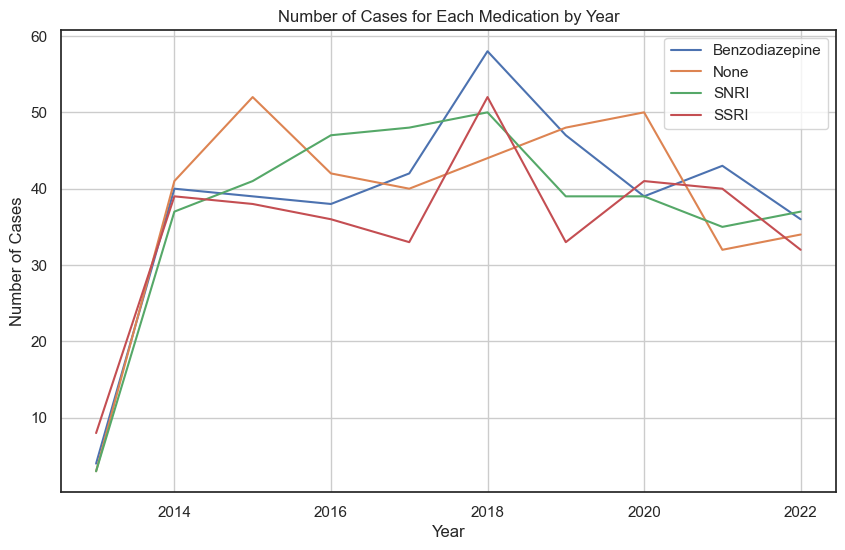

In [38]:
#1.Competitors Analysis

# Selecting necessary columns
df_subset = df[['OCD Diagnosis Year', 'Medications']]

# Grouping by year and medication, counting occurrences
grouped = df_subset.groupby(['OCD Diagnosis Year', 'Medications']).size().reset_index(name='Count')

# Plotting line chart for each medication by year
plt.figure(figsize=(10, 6))

# Loop through each medication to plot its count over the years
for med in grouped['Medications'].unique():
    med_data = grouped[grouped['Medications'] == med]
    plt.plot(med_data['OCD Diagnosis Year'], med_data['Count'], label=med)

plt.xlabel('Year')
plt.ylabel('Number of Cases')
plt.title('Number of Cases for Each Medication by Year')
plt.legend()
plt.grid(True)
plt.show()


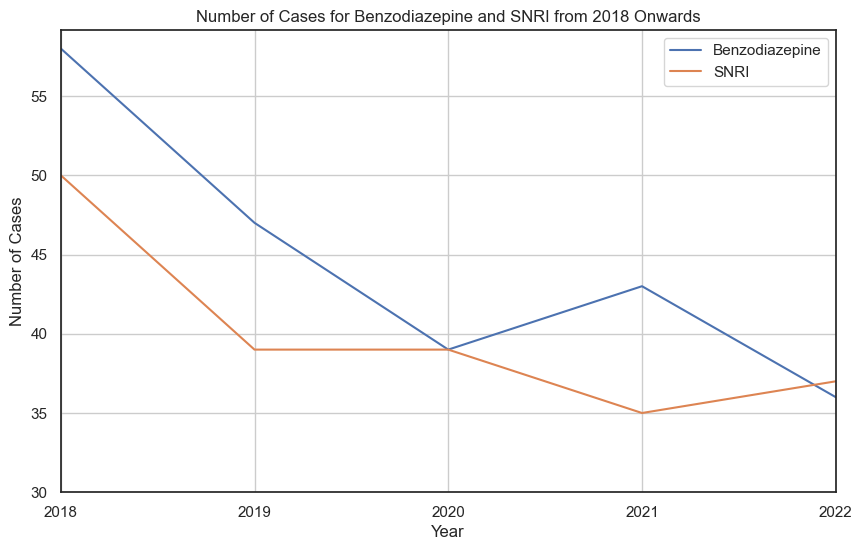

In [39]:
#1.Competitors Analysis
#comparison benzodiazepine with snri (top 2 medications)

# Selecting necessary columns
df_subset = df[['OCD Diagnosis Year', 'Medications']]

# Grouping by year and medication, counting occurrences
grouped = df_subset.groupby(['OCD Diagnosis Year', 'Medications']).size().reset_index(name='Count')

# Filtering data for Benzodiazepine and SNRI from 2018 onwards
filtered_data = grouped[(grouped['Medications'].isin(['Benzodiazepine', 'SNRI'])) & (grouped['OCD Diagnosis Year'] >= 2018)]

plt.figure(figsize=(10, 6))

for med in filtered_data['Medications'].unique():
    med_data = filtered_data[filtered_data['Medications'] == med]
    plt.plot(med_data['OCD Diagnosis Year'], med_data['Count'], label=med)

plt.xlabel('Year')
plt.ylabel('Number of Cases')
plt.title('Number of Cases for Benzodiazepine and SNRI from 2018 Onwards')
plt.legend()
plt.grid(True)

# Set x-axis range from 2018 onwards and y-axis lower limit to start at 30
plt.xlim(2018, grouped['OCD Diagnosis Year'].max())  # Adjust the x-axis range
plt.ylim(30, None)  # Set the lower limit of y-axis to start at 30

# Set x-axis ticks to display whole numbers
plt.xticks(range(2018, int(grouped['OCD Diagnosis Year'].max()) + 1))

plt.show()



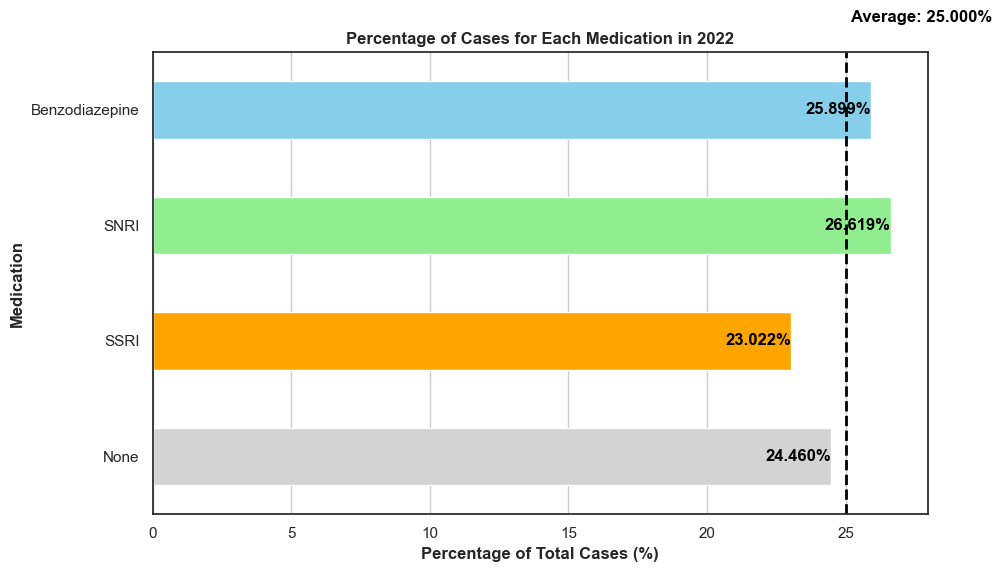

In [40]:
#1.Competitors Analysis
#analysing last registered year information

# Selecting necessary columns
df_subset = df[df['OCD Diagnosis Year'] == 2022][['Medications']]

# Counting occurrences of each medication
medication_counts = df_subset['Medications'].value_counts()

# Ordering bars
order = ['None', 'SSRI', 'SNRI', 'Benzodiazepine']
medication_counts = medication_counts.reindex(order, fill_value=0)

# Calculating percentage of total cases for each medication
percentage_data = (medication_counts / medication_counts.sum()) * 100

# Plotting horizontal bar chart with specified colors
colors = {'Benzodiazepine': 'skyblue', 'SNRI': 'lightgreen', 'SSRI': 'orange', 'None': 'lightgrey'}
plt.figure(figsize=(10, 6))
bars = percentage_data.plot(kind='barh', color=[colors[med] for med in percentage_data.index])

# Adding percentage tags over each bar
for bar, (percentage, count) in zip(bars.patches, zip(percentage_data, medication_counts)):
    plt.text(bar.get_x() + bar.get_width(), bar.get_y() + bar.get_height() / 2,
             f'{percentage:.3f}%', ha='right', va='center', fontweight='bold', color='black')

# Adding average line
average_percentage = percentage_data.mean()
plt.axvline(average_percentage, color='black', linestyle='dashed', linewidth=2)
plt.text(average_percentage + 0.2, len(order) - 0.2, f'Average: {average_percentage:.3f}%', va='center', fontweight='bold', color='black')

plt.xlabel('Percentage of Total Cases (%)', fontweight='bold')
plt.ylabel('Medication', fontweight='bold')
plt.title('Percentage of Cases for Each Medication in 2022', fontweight='bold')
plt.grid(axis='x')

plt.show()




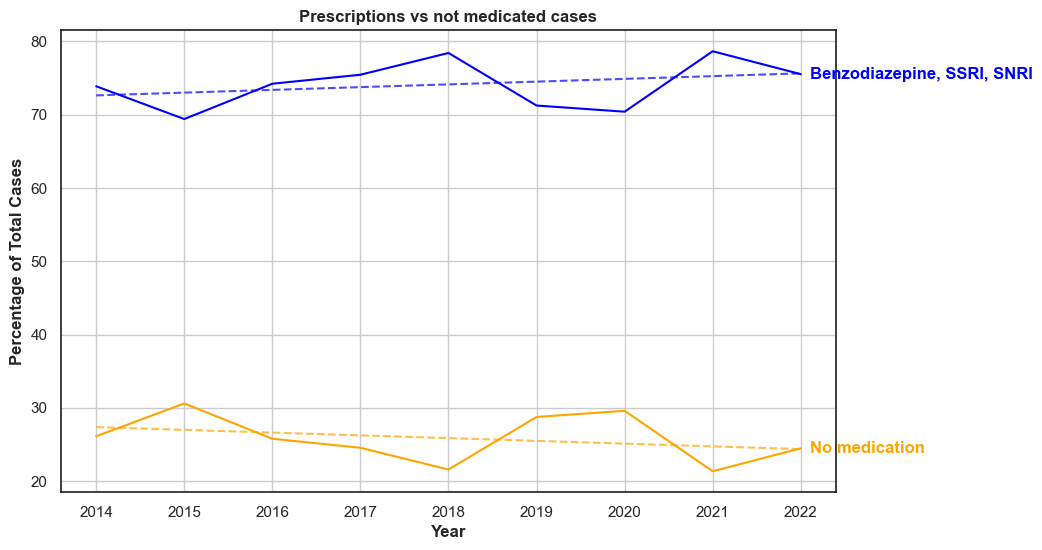

In [46]:
#1.Competitors Analysis
#seeing tendency in proportion of prescriptions for ocd cases vs not medicated cases

# Selecting necessary columns and excluding 2013
df_subset = df[df['OCD Diagnosis Year'] != 2013][['OCD Diagnosis Year', 'Medications']]

# Counting total OCD cases for each year
total_cases = df_subset['OCD Diagnosis Year'].value_counts().reset_index()
total_cases.columns = ['OCD Diagnosis Year', 'Total Cases']

# Counting cases where medication is marked as "None" for OCD for each year
none_med_cases = df_subset[df_subset['Medications'] == 'None']['OCD Diagnosis Year'].value_counts().reset_index()
none_med_cases.columns = ['OCD Diagnosis Year', 'None Medication Cases']

# Merging the two counts based on year
merged_data = pd.merge(total_cases, none_med_cases, on='OCD Diagnosis Year', how='outer').fillna(0)

# Sorting the merged data by year
merged_data = merged_data.sort_values(by='OCD Diagnosis Year')

# Filter the DataFrame for specific medications
medication_sum = df_subset[df_subset['Medications'].isin(['Benzodiazepine', 'SSRI', 'SNRI'])]

# Count the total cases for these medications by year
medication_sum = medication_sum['OCD Diagnosis Year'].value_counts().reset_index()
medication_sum.columns = ['OCD Diagnosis Year', 'Medication Total']

# Merge the medication sum data with the previously prepared DataFrame based on year
merged_data = pd.merge(merged_data, medication_sum, on='OCD Diagnosis Year', how='outer').fillna(0)

# Calculate percentages
merged_data['Medication Percentage'] = (merged_data['Medication Total'] / merged_data['Total Cases']) * 100
merged_data['None Medication Percentage'] = (merged_data['None Medication Cases'] / merged_data['Total Cases']) * 100

# Plotting line chart for sum of Benzodiazepine, SSRI, SNRI vs Cases with Medication as "None" by Year
plt.figure(figsize=(10, 6))

line_bz_ssn_ssri, = plt.plot(merged_data['OCD Diagnosis Year'], merged_data['Medication Percentage'], color='blue', label='Benzodiazepine, SSRI, SNRI')
line_none, = plt.plot(merged_data['OCD Diagnosis Year'], merged_data['None Medication Percentage'], color='orange', label='No medication')

# Adding tags next to the lines
for year, med_percentage, none_percentage in zip(merged_data['OCD Diagnosis Year'], merged_data['Medication Percentage'], merged_data['None Medication Percentage']):
    if year == 2022:  # Adjust this condition based on your data
        plt.text(year + 0.1, med_percentage, 'Benzodiazepine, SSRI, SNRI', color='blue', va='center', fontweight='bold')
        plt.text(year + 0.1, none_percentage, 'No medication', color='orange', va='center', fontweight='bold')

# Linear regression for tendency lines
x = merged_data['OCD Diagnosis Year'].values.reshape(-1, 1)

reg_med = LinearRegression().fit(x, merged_data['Medication Percentage'])
tendency_med = reg_med.predict(x)
plt.plot(merged_data['OCD Diagnosis Year'], tendency_med, linestyle='--', color='blue', alpha=0.7)

reg_none = LinearRegression().fit(x, merged_data['None Medication Percentage'])
tendency_none = reg_none.predict(x)
plt.plot(merged_data['OCD Diagnosis Year'], tendency_none, linestyle='--', color='orange', alpha=0.7)

plt.xlabel('Year', fontweight='bold')
plt.ylabel('Percentage of Total Cases', fontweight='bold')
plt.title('Prescriptions vs not medicated cases', fontweight='bold')
plt.grid(True)

plt.show()


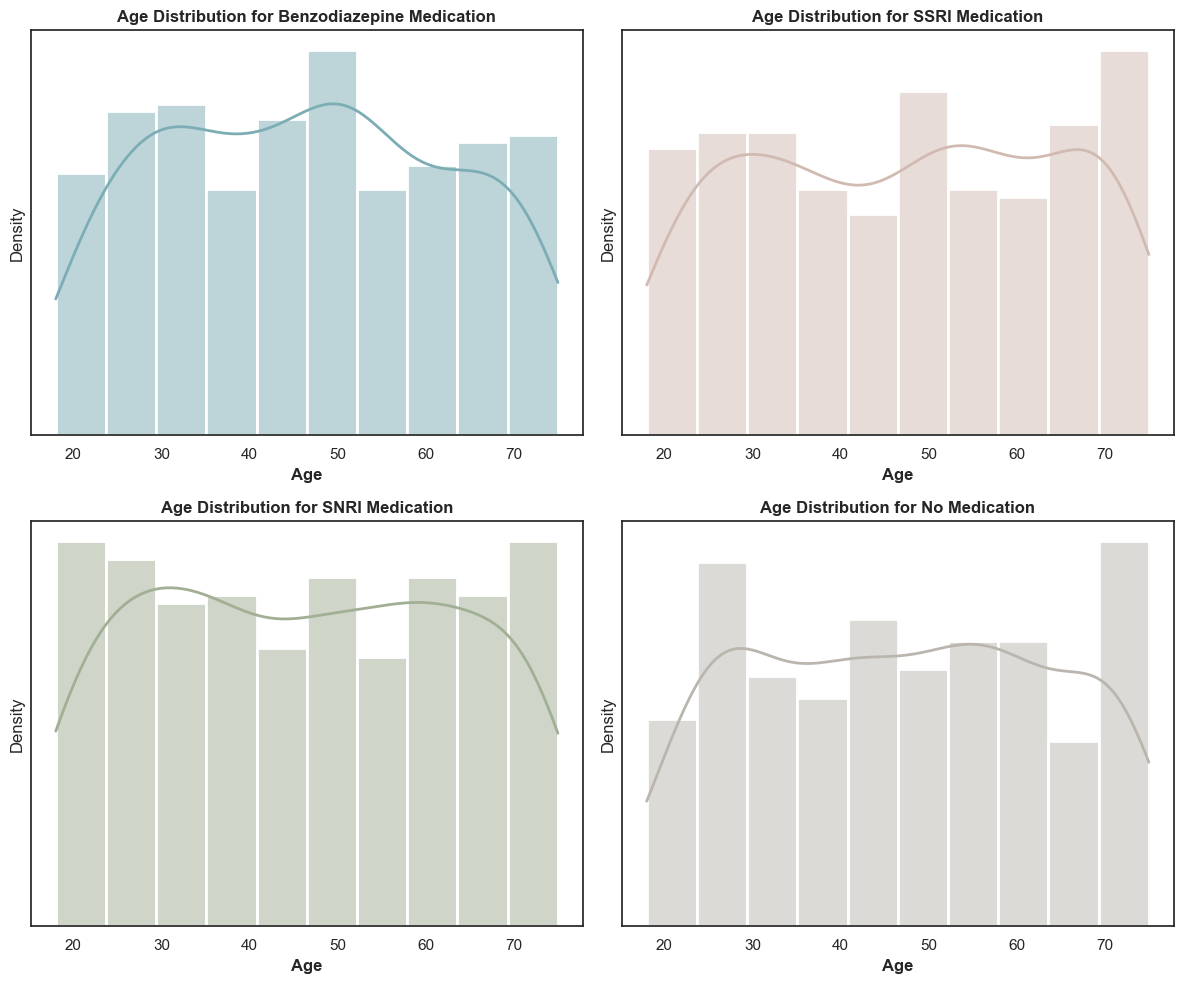

In [49]:
##**2. Distribution Analysis* - Patient profiling - Age

#Representation of age distribution for each type of medication in the market, showing which age groups are more targetted by Benzodiazepine, SNRI and SSRI.
#Benzodiazepine: predominantly used by patients approximately 50 years old.
#SNRI: primarily prescribed for patients aged between 20 and 30 years, or senior patients.
#SSRI: more commonly prescribed for patients over 70 years old.

# Filtering the DataFrame for each medication type and cases with no medication
benzo_data = df[df['Medications'] == 'Benzodiazepine']
ssri_data = df[df['Medications'] == 'SSRI']
snri_data = df[df['Medications'] == 'SNRI']
none_data = df[df['Medications'] == 'None']

# Creating subplots for each medication type and none using histplots
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Plotting histplot for each medication type and none
sns.histplot(data=benzo_data, x='Age', color='#7CADB5', kde=True, ax=axs[0, 0], stat='density', common_norm=False,
             linewidth=2, line_kws={'linewidth': 2, 'color': '#094F60'})  # Making the distribution line darker
axs[0, 0].set_title('Age Distribution for Benzodiazepine Medication', fontweight='bold')  # Making the title bold
axs[0, 0].set_ylabel('Density')  # Hiding the y-axis label
axs[0, 0].tick_params(axis='y', which='both', left=False, labelleft=False)  # Hiding y-axis ticks and labels

sns.histplot(data=ssri_data, x='Age', color='#D1BAB2', kde=True, ax=axs[0, 1], stat='density', common_norm=False,
             linewidth=2, line_kws={'linewidth': 2, 'color': '#7C5449'})  # Making the distribution line darker
axs[0, 1].set_title('Age Distribution for SSRI Medication', fontweight='bold')
axs[0, 1].set_ylabel('Density')
axs[0, 1].tick_params(axis='y', which='both', left=False, labelleft=False)

sns.histplot(data=snri_data, x='Age', color='#A1AF94', kde=True, ax=axs[1, 0], stat='density', common_norm=False,
             linewidth=2, line_kws={'linewidth': 2, 'color': '#4F5E44'})  # Making the distribution line darker
axs[1, 0].set_title('Age Distribution for SNRI Medication', fontweight='bold')
axs[1, 0].set_ylabel('Density')
axs[1, 0].tick_params(axis='y', which='both', left=False, labelleft=False)

sns.histplot(data=none_data, x='Age', color='#BAB6AE', kde=True, ax=axs[1, 1], stat='density', common_norm=False,
             linewidth=2, line_kws={'linewidth': 2, 'color': '#69675D'})  # Making the distribution line darker
axs[1, 1].set_title('Age Distribution for No Medication', fontweight='bold')
axs[1, 1].set_ylabel('Density')
axs[1, 1].tick_params(axis='y', which='both', left=False, labelleft=False)

# Setting common labels
for ax in axs.flat:
    ax.set_xlabel('Age', fontweight='bold')  # Making x-axis label bold

# Adjust layout for better display
plt.tight_layout()
plt.show()

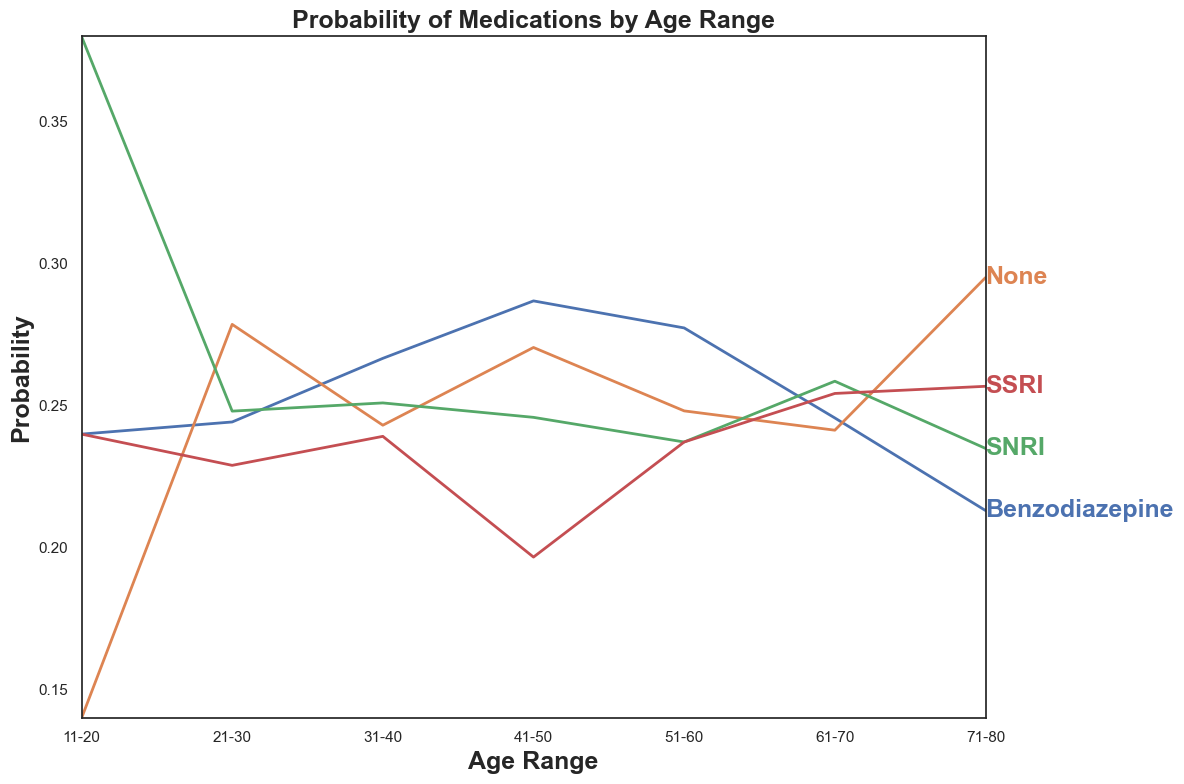

In [50]:
##**2. Distribution Analysis* - Patient profiling - Age
#Probability of being medicated for OCD with Benzodiazepine, SNRI or SSRI given certain age.

# Calculating the probability of medications for each age range
age_range_medication_prob = df.groupby('Age Range')['Medications'].value_counts(normalize=True).unstack().fillna(0)

# Plotting the probabilities using a line plot
plt.figure(figsize=(12, 8))
for i, medication in enumerate(age_range_medication_prob.columns):
    line = plt.plot(age_range_medication_prob.index, age_range_medication_prob[medication], linewidth=2)  # Set line thickness to 2
    color = line[0].get_color()
    plt.text(age_range_medication_prob.index[-1], age_range_medication_prob[medication][-1], medication, color=color, fontweight='bold', verticalalignment='center', fontsize=1.5 * plt.rcParams['font.size'])  # Set text size to 1.5 times default size

plt.title('Probability of Medications by Age Range', fontweight='bold', fontsize=1.5 * plt.rcParams['font.size'])  # Increase title font size
plt.xlabel('Age Range', fontweight='bold', fontsize=1.5 * plt.rcParams['font.size'])  # Increase x-label font size
plt.ylabel('Probability', fontweight='bold', fontsize=1.5 * plt.rcParams['font.size'])  # Increase y-label font size
plt.xticks(rotation=0)  # Horizontal x-axis labels
plt.margins(0.0)  # Add padding
plt.tight_layout()
plt.show()

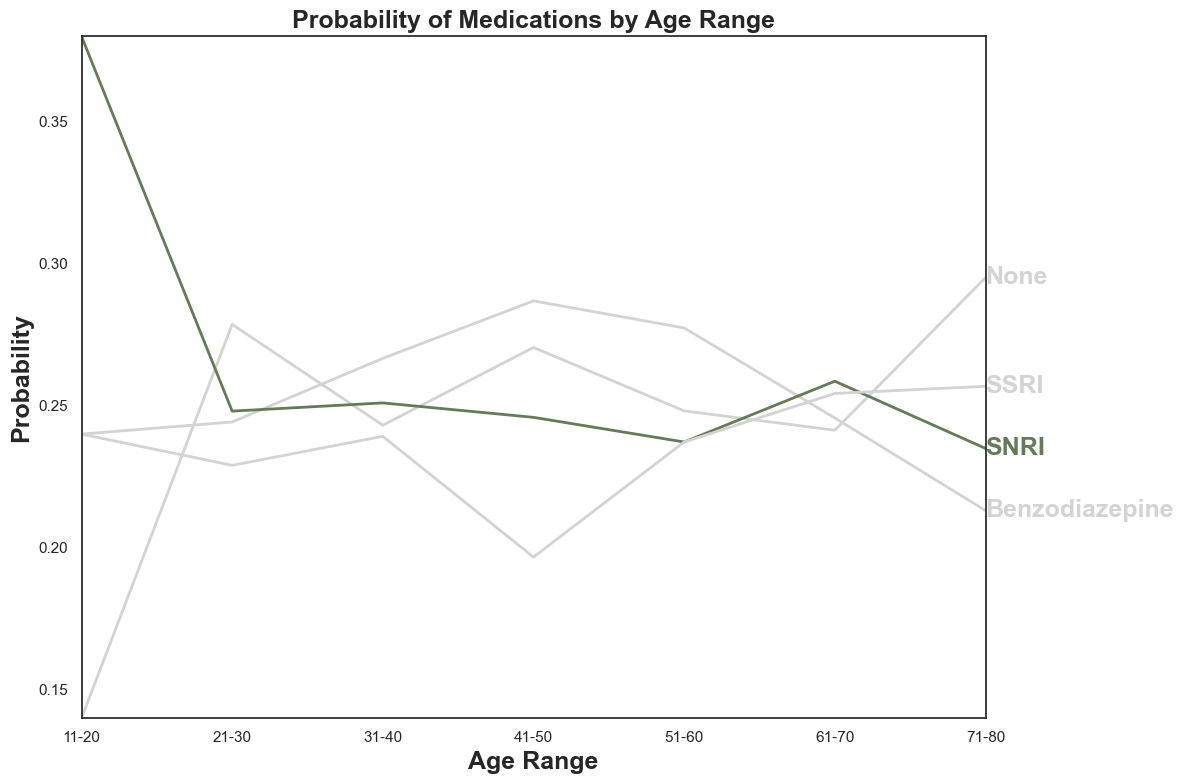

In [51]:
##**2. Distribution Analysis* - Patient profiling - Age

# Calculating the probability of medications for each age range
age_range_medication_prob = df.groupby('Age Range')['Medications'].value_counts(normalize=True).unstack().fillna(0)

# Plotting the probabilities using a line plot
plt.figure(figsize=(12, 8))
for i, medication in enumerate(age_range_medication_prob.columns):
    if medication == 'SNRI':
        line = plt.plot(age_range_medication_prob.index, age_range_medication_prob[medication], linewidth=2, color='#657A56', label=medication)
        color = '#657A56'
    else:
        line = plt.plot(age_range_medication_prob.index, age_range_medication_prob[medication], linewidth=2, color='lightgrey', label=None)
        color = 'lightgrey'
    
    plt.text(age_range_medication_prob.index[-1], age_range_medication_prob[medication][-1], medication, color=color, fontweight='bold', verticalalignment='center', fontsize=1.5 * plt.rcParams['font.size'])  # Set text size to 1.5 times default size

plt.title('Probability of Medications by Age Range', fontweight='bold', fontsize=1.5 * plt.rcParams['font.size'])  # Increase title font size
plt.xlabel('Age Range', fontweight='bold', fontsize=1.5 * plt.rcParams['font.size'])  # Increase x-label font size
plt.ylabel('Probability', fontweight='bold', fontsize=1.5 * plt.rcParams['font.size'])  # Increase y-label font size
plt.xticks(rotation=0)  # Horizontal x-axis labels
plt.margins(0.0)  # Add padding
plt.tight_layout()
plt.show()

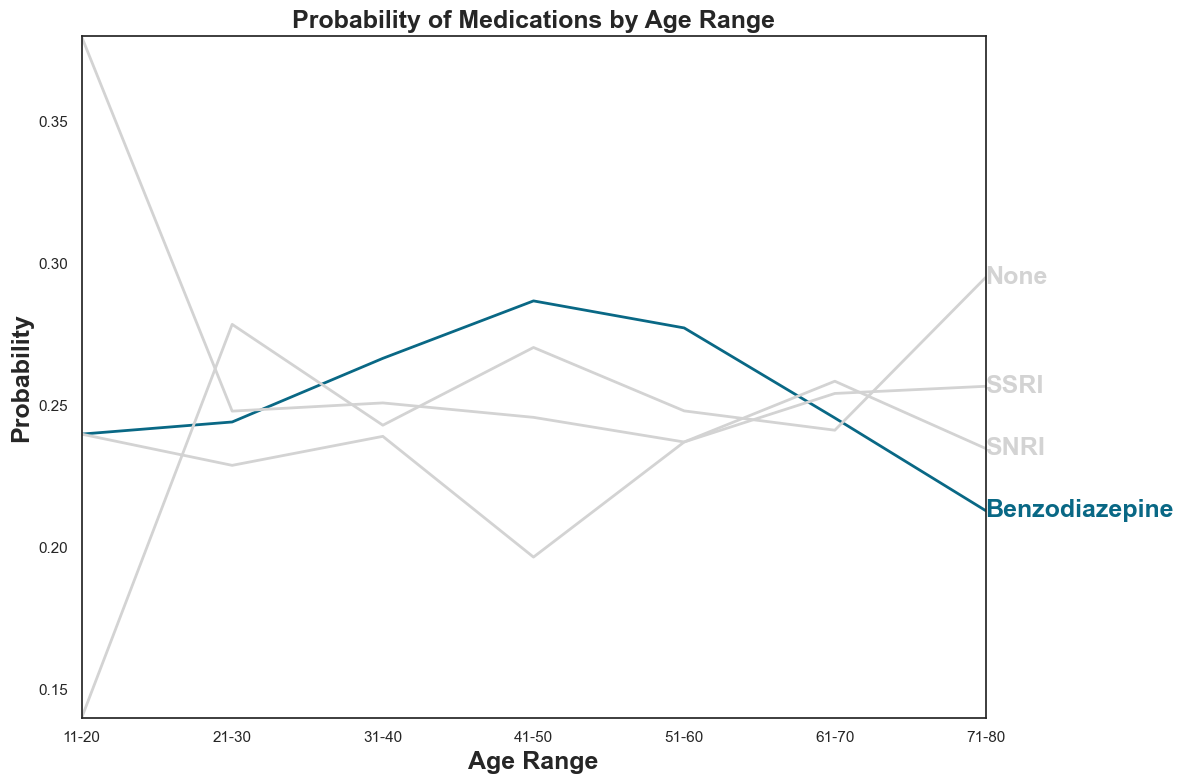

In [52]:
##**2. Distribution Analysis* - Patient profiling - Age

# Calculating the probability of medications for each age range
age_range_medication_prob = df.groupby('Age Range')['Medications'].value_counts(normalize=True).unstack().fillna(0)

# Plotting the probabilities using a line plot
plt.figure(figsize=(12, 8))
for i, medication in enumerate(age_range_medication_prob.columns):
    if medication == 'Benzodiazepine':
        line = plt.plot(age_range_medication_prob.index, age_range_medication_prob[medication], linewidth=2, color='#096885', label=medication)
        color = '#096885'
    else:
        line = plt.plot(age_range_medication_prob.index, age_range_medication_prob[medication], linewidth=2, color='lightgrey', label=None)
        color = 'lightgrey'
    
    plt.text(age_range_medication_prob.index[-1], age_range_medication_prob[medication][-1], medication, color=color, fontweight='bold', verticalalignment='center', fontsize=1.5 * plt.rcParams['font.size'])  # Set text size to 1.5 times default size

plt.title('Probability of Medications by Age Range', fontweight='bold', fontsize=1.5 * plt.rcParams['font.size'])  # Increase title font size
plt.xlabel('Age Range', fontweight='bold', fontsize=1.5 * plt.rcParams['font.size'])  # Increase x-label font size
plt.ylabel('Probability', fontweight='bold', fontsize=1.5 * plt.rcParams['font.size'])  # Increase y-label font size
plt.xticks(rotation=0)  # Horizontal x-axis labels
plt.margins(0.0)  # Add padding
plt.tight_layout()
plt.show()

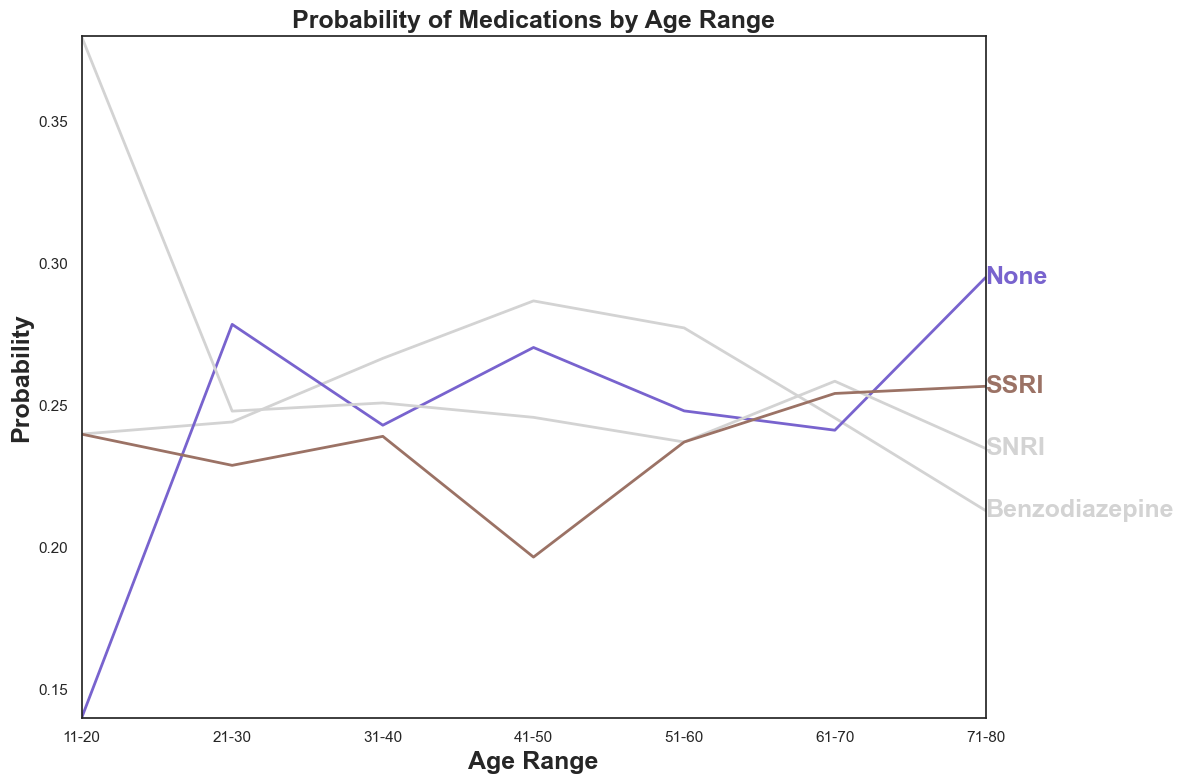

In [53]:
##**2. Distribution Analysis* - Patient profiling - Age

# Calculating the probability of medications for each age range
age_range_medication_prob = df.groupby('Age Range')['Medications'].value_counts(normalize=True).unstack().fillna(0)

# Plotting the probabilities using a line plot
plt.figure(figsize=(12, 8))
for i, medication in enumerate(age_range_medication_prob.columns):
    if medication in ['SNRI', 'Benzodiazepine']:
        line = plt.plot(age_range_medication_prob.index, age_range_medication_prob[medication], linewidth=2, color='lightgrey', label=medication)
        color = 'lightgrey'
    elif medication == 'None':
        line = plt.plot(age_range_medication_prob.index, age_range_medication_prob[medication], linewidth=2, color='#7863CE', label=medication)
        color = '#7863CE'
    elif medication == 'SSRI':
        line = plt.plot(age_range_medication_prob.index, age_range_medication_prob[medication], linewidth=2, color='#9B7265', label=medication)
        color = '#9B7265'
    else:
        line = plt.plot(age_range_medication_prob.index, age_range_medication_prob[medication], linewidth=2, color='lightgrey', label=None)
        color = 'lightgrey'
    
    plt.text(age_range_medication_prob.index[-1], age_range_medication_prob[medication][-1], medication, color=color, fontweight='bold', verticalalignment='center', fontsize=1.5 * plt.rcParams['font.size'])  # Set text size to 1.5 times default size

plt.title('Probability of Medications by Age Range', fontweight='bold', fontsize=1.5 * plt.rcParams['font.size'])  # Increase title font size
plt.xlabel('Age Range', fontweight='bold', fontsize=1.5 * plt.rcParams['font.size'])  # Increase x-label font size
plt.ylabel('Probability', fontweight='bold', fontsize=1.5 * plt.rcParams['font.size'])  # Increase y-label font size
plt.xticks(rotation=0)  # Horizontal x-axis labels
plt.margins(0.0)  # Add padding
plt.tight_layout()
plt.show()

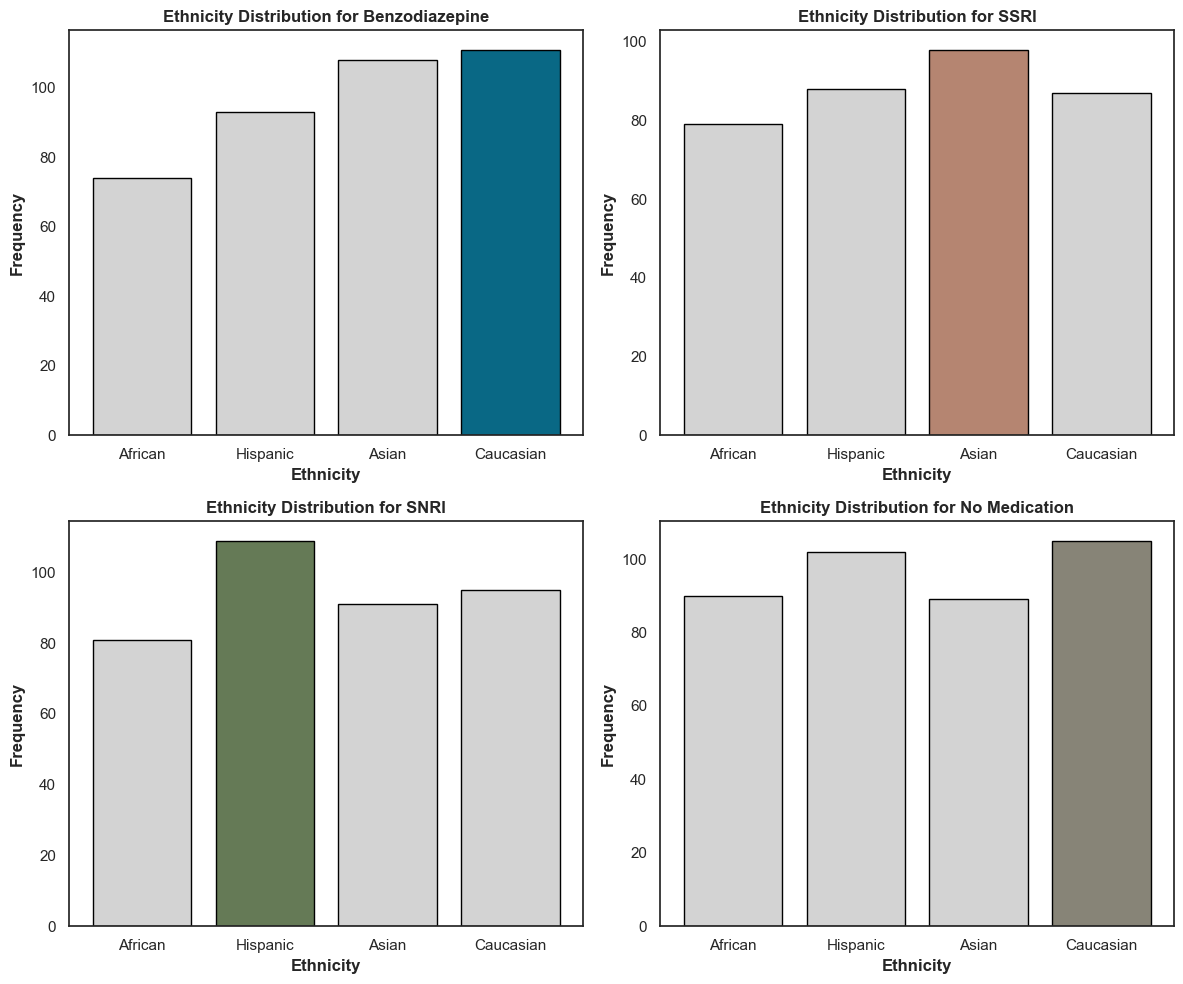

In [54]:
##**2. Distribution Analysis* - Patient profiling - Ethnicity

# Define the order of ethnicities
ethnicity_order = ['African', 'Hispanic', 'Asian', 'Caucasian']  # Replace with your specific ethnicities in the desired order

# Create a mapping of ethnicities to numerical values
ethnicity_mapping = {eth: i for i, eth in enumerate(ethnicity_order)}

# Map the 'Ethnicity' column to numerical values
benzo_eth = benzo_data['Ethnicity'].map(ethnicity_mapping)
ssri_eth = ssri_data['Ethnicity'].map(ethnicity_mapping)
snri_eth = snri_data['Ethnicity'].map(ethnicity_mapping)
none_eth = none_data['Ethnicity'].map(ethnicity_mapping)

# Creating subplots for each medication type and none
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Plotting histograms for each medication type and none
for ax, data, title in zip(axs.flatten(), [benzo_eth, ssri_eth, snri_eth, none_eth], ['Benzodiazepine', 'SSRI', 'SNRI', 'No Medication']):
    values, counts = np.unique(data, return_counts=True)
    max_freq_index = np.argmax(counts)

    colors = ['lightgrey'] * len(ethnicity_order)
    if title == 'Benzodiazepine':
        colors[max_freq_index] = '#096885'
    elif title == 'SSRI':
        colors[max_freq_index] = '#B58571'
    elif title == 'SNRI':
        colors[max_freq_index] = '#657A56'
    elif title == 'No Medication':
        colors[max_freq_index] = '#878477'

    ax.bar(ethnicity_order, counts, color=colors, edgecolor='black')
    ax.set_title(f'Ethnicity Distribution for {title}', fontweight='bold')
    ax.set_xlabel('Ethnicity', fontweight='bold')
    ax.set_ylabel('Frequency', fontweight='bold')

# Adjust layout for better display
plt.tight_layout()
plt.show()

In [55]:
#Representation of ethnic distribution for each type of medication in the market, indicating which ethnic groups are more targeted by Benzodiazepine, SNRI, and SSRI.
#Given the lack of specific information about the territories where each diagnosis was made, we emphasize the necessity of developing a regional analysis. This analysis would help determine whether these trends reflect doctors' preferences in prescribing certain medications in different continents, market sizes, or if it pertains to treatment efficacy, among other potential reasons.

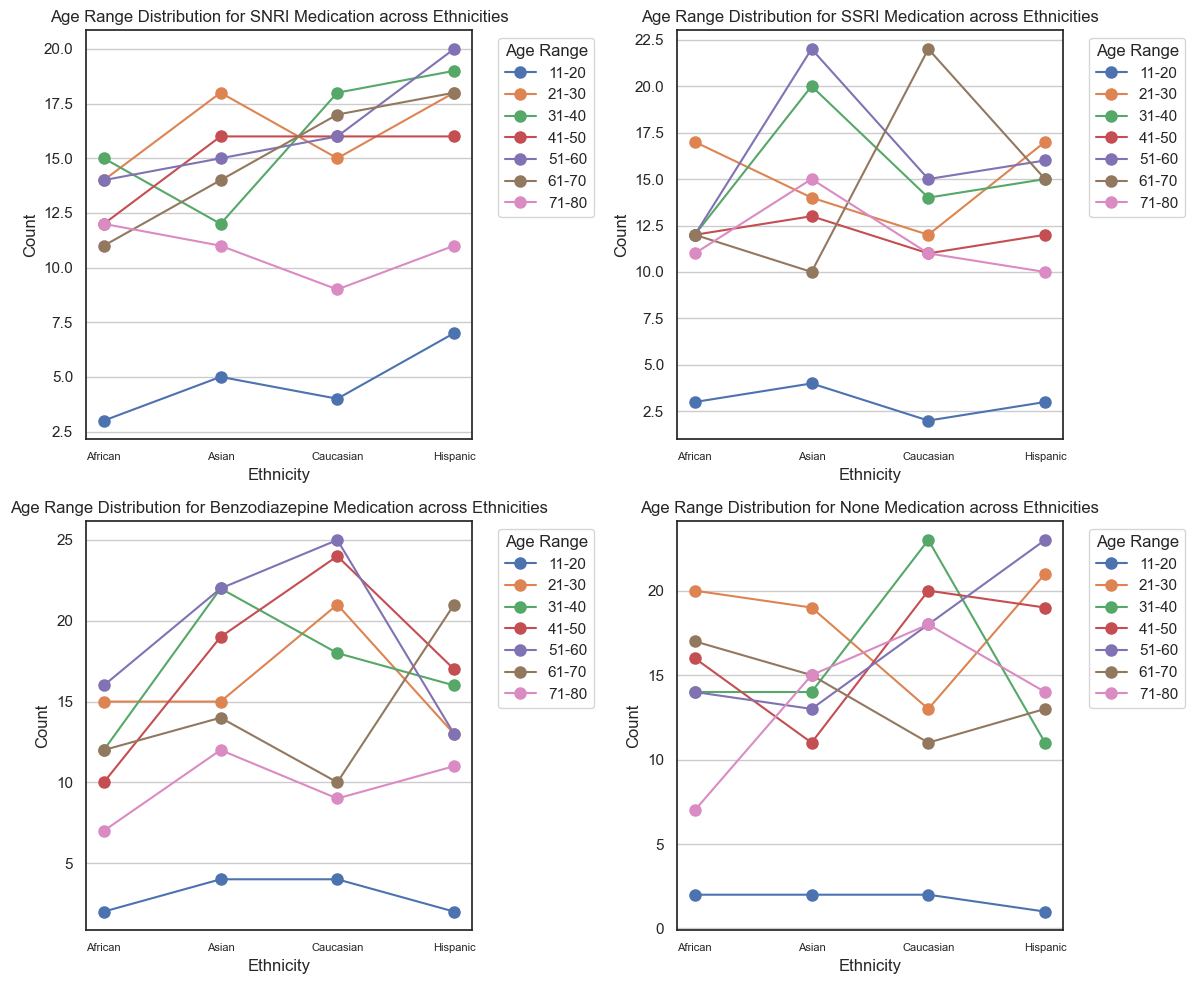

In [56]:
##**2. Distribution Analysis* - Patient profiling - Ethnicity and age

# Assuming 'Medications' column exists in your dataset
# Grouping data by Medication, Age Range, and Ethnicity, and counting occurrences
grouped = df.groupby(['Medications', 'Age Range', 'Ethnicity']).size().unstack(fill_value=0)

# List of all medications available in the dataset
medication_types = df['Medications'].unique()

# Create subplots for each medication type using a loop
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Plotting line charts for each medication type
for i, (medication, ax) in enumerate(zip(medication_types, axs.flatten())):
    medication_data = grouped.loc[medication]
    medication_data.transpose().plot(kind='line', marker='o', ax=ax, markersize=8)
    ax.set_title(f'Age Range Distribution for {medication} Medication across Ethnicities')
    ax.set_xlabel('Ethnicity')
    ax.set_ylabel('Count')
    ax.grid(axis='y')
    ax.legend(title='Age Range', bbox_to_anchor=(1.05, 1), loc='upper left')
    
    # Set x-ticks and labels based on the number of ethnicities
    ax.set_xticks(range(len(medication_data.columns)))
    ax.set_xticklabels(medication_data.columns, rotation=0)
    ax.tick_params(axis='x', which='major', labelsize=8)

# Adjust layout for better display
plt.tight_layout()
plt.show()

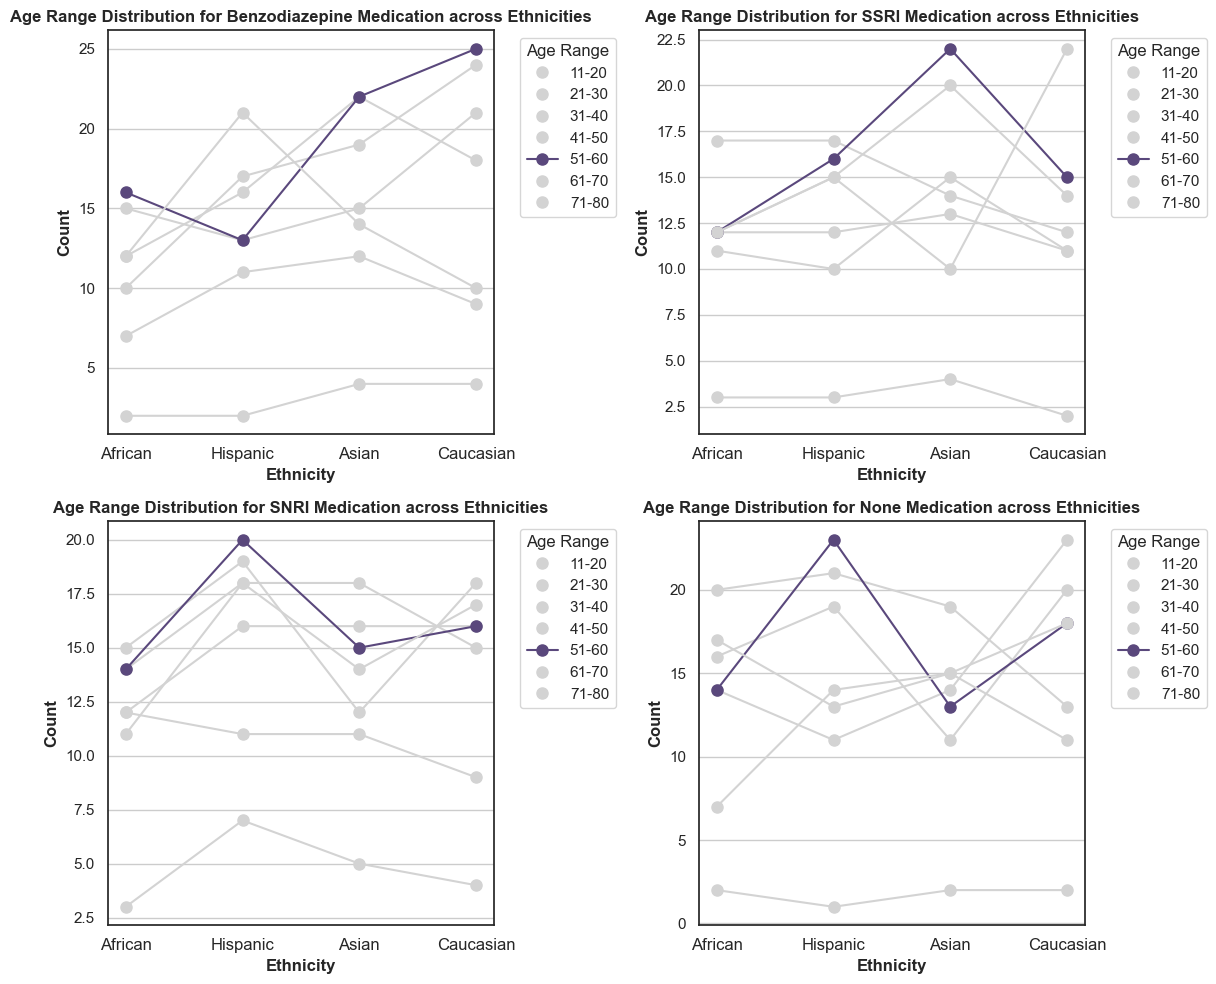

In [57]:
##**2. Distribution Analysis* - Patient profiling - Ethnicity and age
#The representation combines ethnic groups and age ranges, indicating that across various ethnicities, patients between 51 and 60 years old are the most targeted group.

# Grouping data by Medication, Age Range, and Ethnicity, and counting occurrences
grouped = df.groupby(['Medications', 'Age Range', 'Ethnicity']).size().unstack(fill_value=0)

# Rearranged medication types
medication_order = ['Benzodiazepine', 'SSRI', 'SNRI', 'None']

# Reorder Ethnicity columns in the grouped dataframe
ethnicity_order = ['African', 'Hispanic', 'Asian', 'Caucasian']
grouped = grouped.reindex(columns=ethnicity_order)

# Create subplots for each medication type using a loop
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Plotting line charts for each rearranged medication type
for medication, ax in zip(medication_order, axs.flatten()):
    medication_data = grouped.loc[medication]
    lines = medication_data.transpose().plot(kind='line', marker='o', ax=ax, markersize=8)
    
    for line in lines.get_lines():
        if line.get_label() == '51-60':
            line.set_color('#5A487C')
            line.set_markerfacecolor('#5A487C')  # Set symbol color to match the line color
        else:
            line.set_color('lightgrey')
            line.set_markerfacecolor('lightgrey')  # Set symbol color for other lines

    ax.set_title(f'Age Range Distribution for {medication} Medication across Ethnicities', fontweight='bold')
    ax.set_xlabel('Ethnicity', fontweight='bold')
    ax.set_ylabel('Count', fontweight='bold')
    ax.grid(axis='y')
    legend = ax.legend(title='Age Range', bbox_to_anchor=(1.05, 1), loc='upper left')
    legend.set_title('Age Range')  # Keep the age range legend title
    
    # Hide legend entries for age ranges other than '51-60'
    for line in lines.get_lines():
        if line.get_label() != '51-60':
            legend.legendHandles[lines.get_lines().index(line)].set_visible(False)

    # Set x-ticks and labels based on the number of ethnicities
    ax.set_xticks(range(len(medication_data.columns)))
    ax.set_xticklabels(medication_data.columns, rotation=0, fontsize=8 * 1.5)  # Adjust font size for ethnicity tags

# Adjust layout for better display
plt.tight_layout()
plt.show()

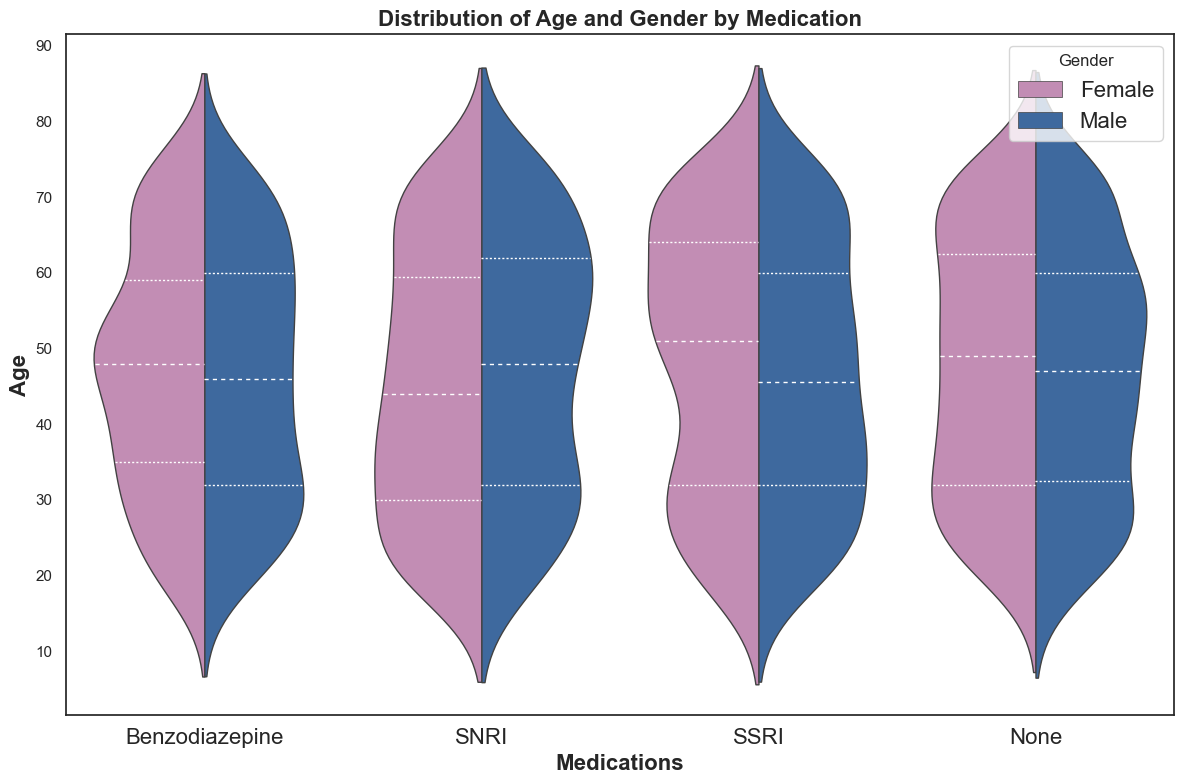

In [58]:
##**2. Distribution Analysis* - patient profiling -  age and gender
#The representation displays the gender distribution for each type of medication.
#At the age where the highest number of patients receive each prescription, females outnumber males. This gender discrepancy may suggest a certain predisposition for medication need.

# Define custom colors for female and male
custom_palette = {'Female': '#CB84B8', 'Male': '#2E68AE'}

# Define the order of medications
medication_order = ['Benzodiazepine', 'SNRI', 'SSRI', 'None']

plt.figure(figsize=(12, 8))

# Use violinplot with quartiles
violin = sns.violinplot(
    x='Medications', y='Age', hue='Gender', data=df, split=True,
    palette=custom_palette, order=medication_order, inner='quartile', linewidth=1  # Set the linewidth
)

# Set quartile lines to white
for l in violin.lines:
    l.set_color('white')

# Set title and labels with 1.5 times the default font size
plt.title('Distribution of Age and Gender by Medication', fontweight='bold', fontsize=16) 
plt.xlabel('Medications', fontweight='bold', fontsize=16)
plt.ylabel('Age', fontweight='bold', fontsize=16)

# Set x-axis labels horizontally
plt.xticks(rotation=0, fontsize=16)  # Adjust the font size proportionally

# Add legend with adjusted font size
plt.legend(title='Gender', loc='upper right', fontsize=16)

plt.tight_layout()
plt.show()


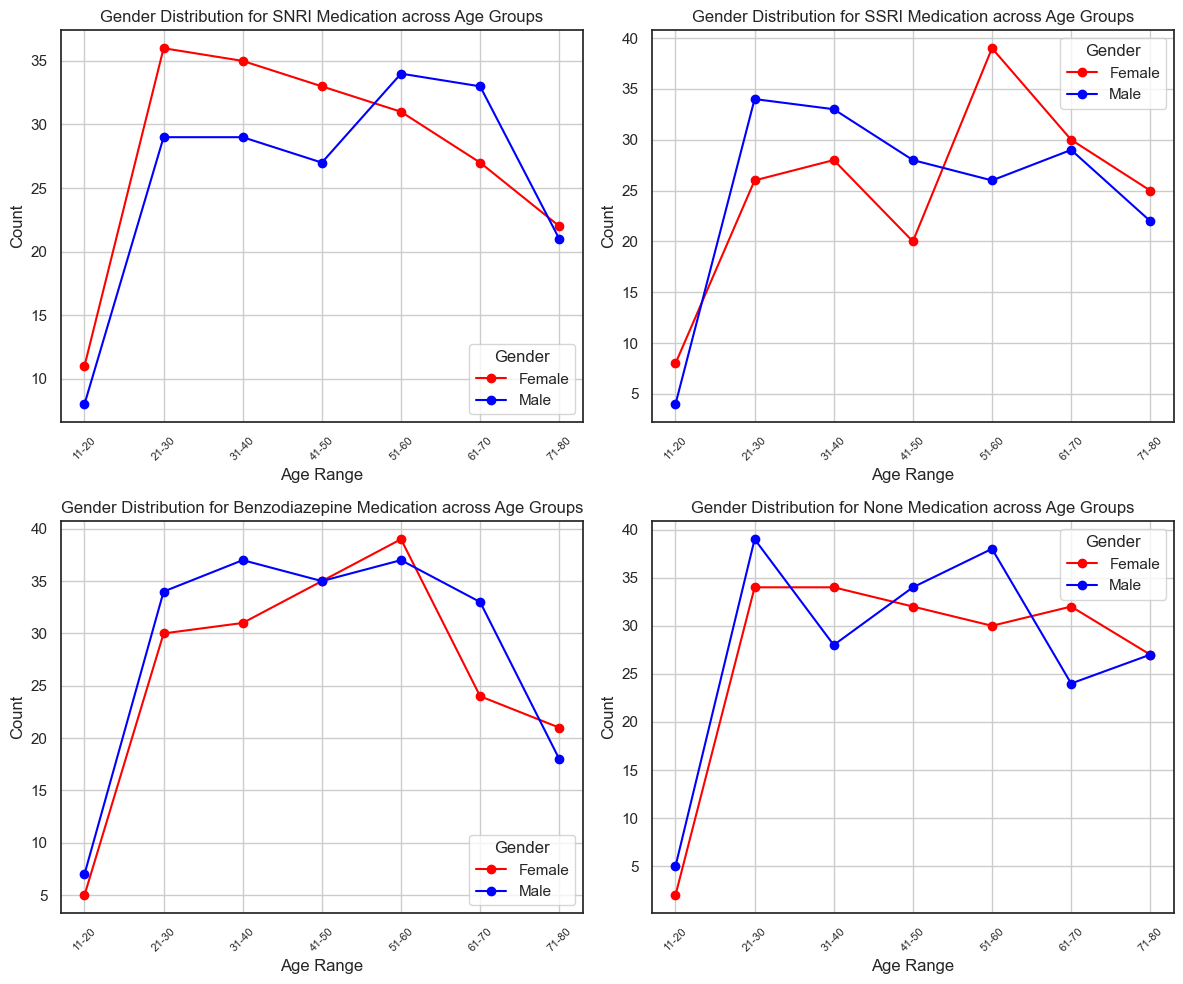

In [59]:
##**2. Distribution Analysis* - patient profiling - age and gender

# Assuming 'Medications' column exists in your dataset
# Grouping data by Medication, Age Range, and Gender, and counting occurrences
grouped = df.groupby(['Medications', 'Age Range', 'Gender']).size().unstack(fill_value=0)

# List of all medications available in the dataset
medication_types = df['Medications'].unique()

# Create subplots for each medication type using a loop
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Plotting line charts for each medication type
for i, (medication, ax) in enumerate(zip(medication_types, axs.flatten())):
    medication_data = grouped.loc[medication]
    medication_data.plot(kind='line', marker='o', linestyle='-', color=['red', 'blue'], ax=ax)
    ax.set_title(f'Gender Distribution for {medication} Medication across Age Groups')
    ax.set_xlabel('Age Range')
    ax.set_ylabel('Count')
    ax.grid(axis='both')
    ax.legend(title='Gender', labels=['Female', 'Male'])
    ax.set_xticks(range(len(medication_data.index)))
    ax.set_xticklabels(medication_data.index, rotation=45)
    ax.tick_params(axis='x', which='major', labelsize=8)

# Adjust layout for better display
plt.tight_layout()
plt.show()

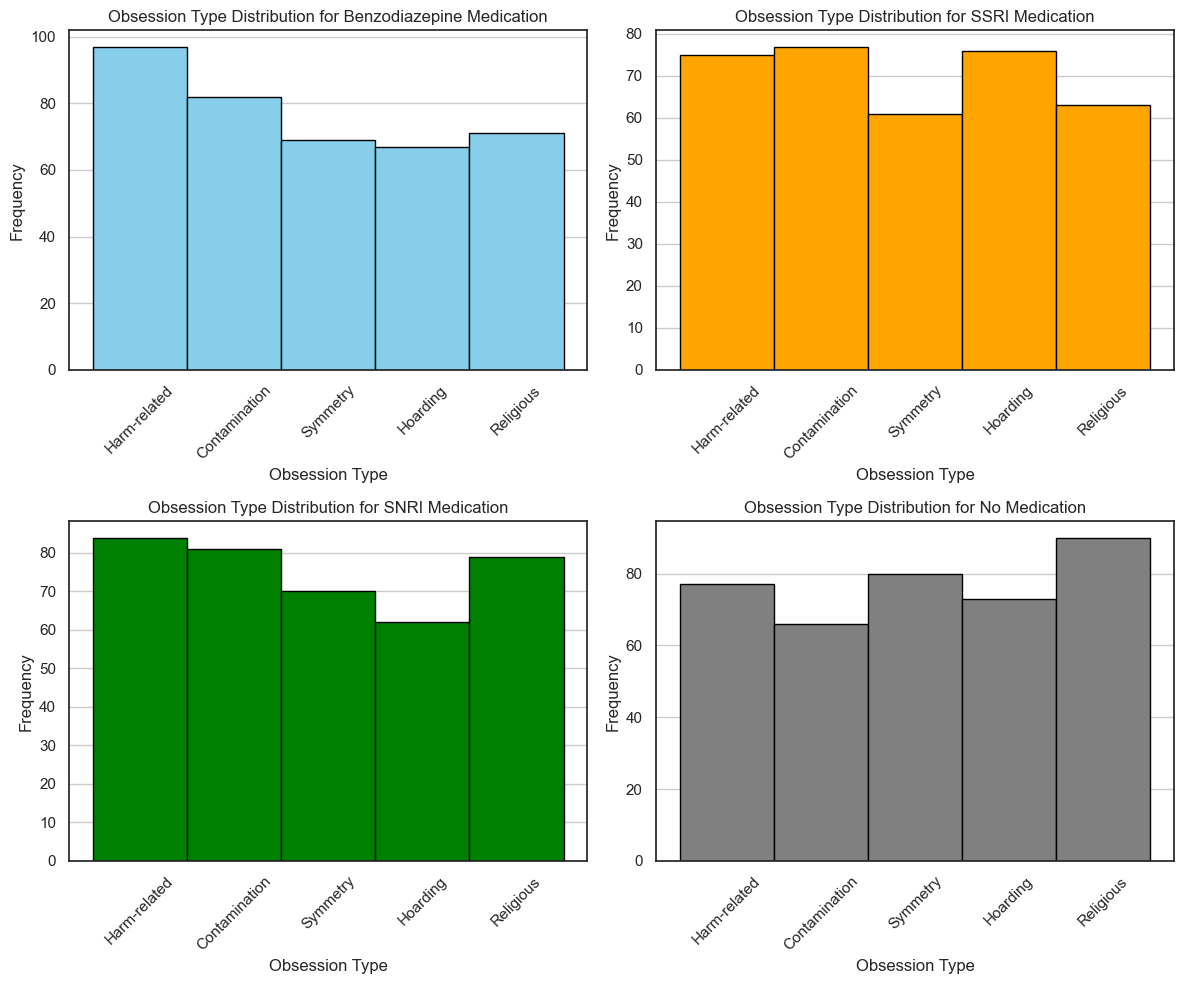

In [49]:
##**PREDISPOSITION FOR MEDICATION USE* - Obsession types

# Get unique Obsession Types from the entire dataset
obsession_types = df['Obsession Type'].unique()

# Create a mapping of Obsession Types to numerical values
obsession_mapping = {obs: i for i, obs in enumerate(obsession_types)}

# Map the 'Obsession Type' column to numerical values for each medication type
benzo_obsession = benzo_data['Obsession Type'].map(obsession_mapping)
ssri_obsession = ssri_data['Obsession Type'].map(obsession_mapping)
snri_obsession = snri_data['Obsession Type'].map(obsession_mapping)
none_obsession = none_data['Obsession Type'].map(obsession_mapping)

# Create subplots for each medication type and none
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Plot histograms for each medication type and none
axs[0, 0].hist(benzo_obsession, bins=len(obsession_types), color='skyblue', edgecolor='black', range=(-0.5, len(obsession_types) - 0.5))
axs[0, 0].set_title('Obsession Type Distribution for Benzodiazepine Medication')
axs[0, 0].set_xticks(range(len(obsession_types)))
axs[0, 0].set_xticklabels(obsession_types, rotation=45)

axs[0, 1].hist(ssri_obsession, bins=len(obsession_types), color='orange', edgecolor='black', range=(-0.5, len(obsession_types) - 0.5))
axs[0, 1].set_title('Obsession Type Distribution for SSRI Medication')
axs[0, 1].set_xticks(range(len(obsession_types)))
axs[0, 1].set_xticklabels(obsession_types, rotation=45)

axs[1, 0].hist(snri_obsession, bins=len(obsession_types), color='green', edgecolor='black', range=(-0.5, len(obsession_types) - 0.5))
axs[1, 0].set_title('Obsession Type Distribution for SNRI Medication')
axs[1, 0].set_xticks(range(len(obsession_types)))
axs[1, 0].set_xticklabels(obsession_types, rotation=45)

axs[1, 1].hist(none_obsession, bins=len(obsession_types), color='gray', edgecolor='black', range=(-0.5, len(obsession_types) - 0.5))
axs[1, 1].set_title('Obsession Type Distribution for No Medication')
axs[1, 1].set_xticks(range(len(obsession_types)))
axs[1, 1].set_xticklabels(obsession_types, rotation=45)

# Setting common labels
for ax in axs.flat:
    ax.set_xlabel('Obsession Type')
    ax.set_ylabel('Frequency')
    ax.grid(axis='y')

# Adjust layout for better display
plt.tight_layout()
plt.show()


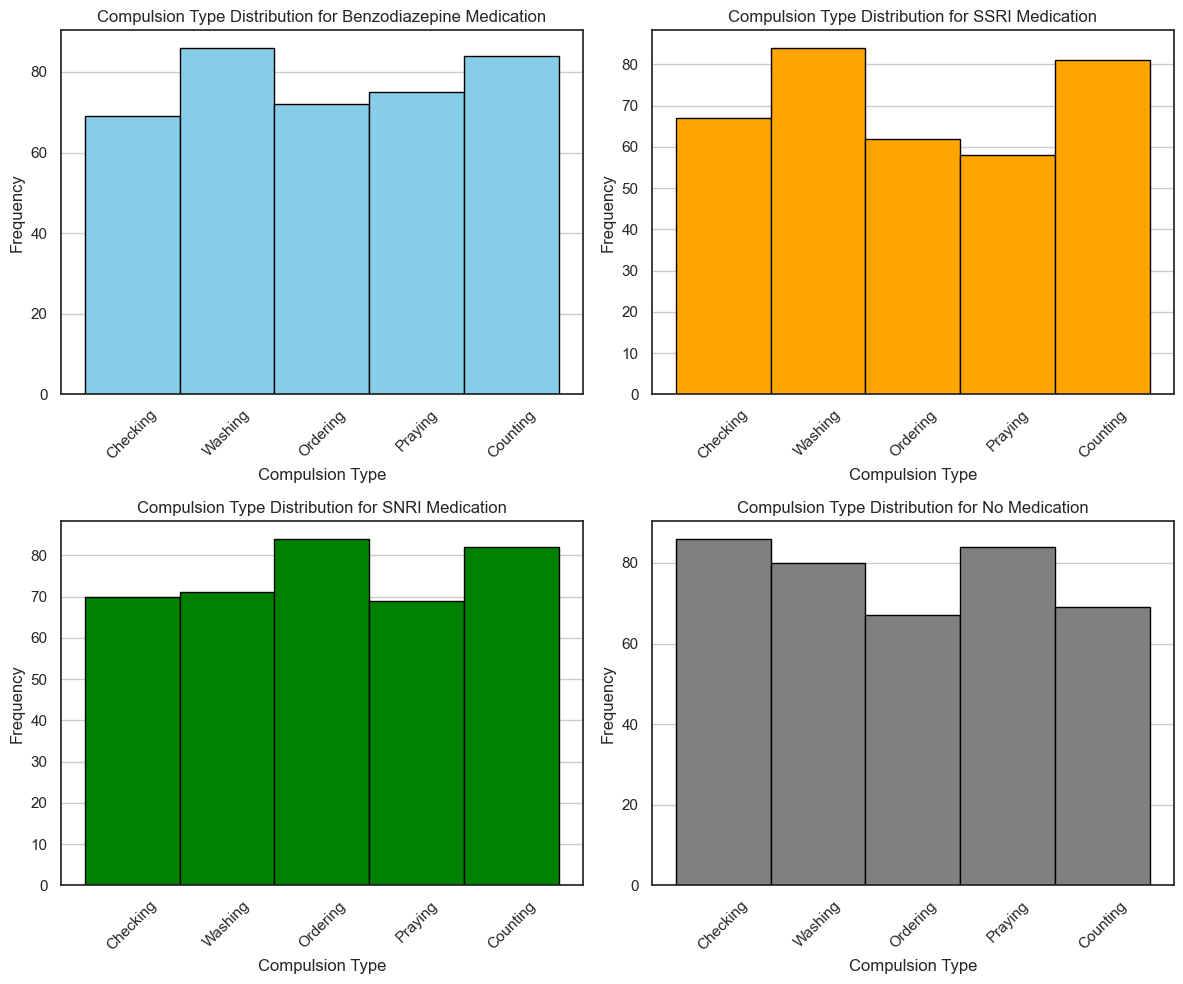

In [50]:
##**4. PREDISPOSITION FOR MEDICATION USE* - Compulsion types

# Get unique Compulsion Types from the entire dataset
compulsion_types = df['Compulsion Type'].unique()

# Create a mapping of Compulsion Types to numerical values
compulsion_mapping = {comp: i for i, comp in enumerate(compulsion_types)}

# Map the 'Compulsion Type' column to numerical values for each medication type
benzo_compulsion = benzo_data['Compulsion Type'].map(compulsion_mapping)
ssri_compulsion = ssri_data['Compulsion Type'].map(compulsion_mapping)
snri_compulsion = snri_data['Compulsion Type'].map(compulsion_mapping)
none_compulsion = none_data['Compulsion Type'].map(compulsion_mapping)

# Create subplots for each medication type and none
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Plot histograms for each medication type and none
axs[0, 0].hist(benzo_compulsion, bins=len(compulsion_types), color='skyblue', edgecolor='black', range=(-0.5, len(compulsion_types) - 0.5))
axs[0, 0].set_title('Compulsion Type Distribution for Benzodiazepine Medication')
axs[0, 0].set_xticks(range(len(compulsion_types)))
axs[0, 0].set_xticklabels(compulsion_types, rotation=45)

axs[0, 1].hist(ssri_compulsion, bins=len(compulsion_types), color='orange', edgecolor='black', range=(-0.5, len(compulsion_types) - 0.5))
axs[0, 1].set_title('Compulsion Type Distribution for SSRI Medication')
axs[0, 1].set_xticks(range(len(compulsion_types)))
axs[0, 1].set_xticklabels(compulsion_types, rotation=45)

axs[1, 0].hist(snri_compulsion, bins=len(compulsion_types), color='green', edgecolor='black', range=(-0.5, len(compulsion_types) - 0.5))
axs[1, 0].set_title('Compulsion Type Distribution for SNRI Medication')
axs[1, 0].set_xticks(range(len(compulsion_types)))
axs[1, 0].set_xticklabels(compulsion_types, rotation=45)

axs[1, 1].hist(none_compulsion, bins=len(compulsion_types), color='gray', edgecolor='black', range=(-0.5, len(compulsion_types) - 0.5))
axs[1, 1].set_title('Compulsion Type Distribution for No Medication')
axs[1, 1].set_xticks(range(len(compulsion_types)))
axs[1, 1].set_xticklabels(compulsion_types, rotation=45)

# Setting common labels
for ax in axs.flat:
    ax.set_xlabel('Compulsion Type')
    ax.set_ylabel('Frequency')
    ax.grid(axis='y')

# Adjust layout for better display
plt.tight_layout()
plt.show()


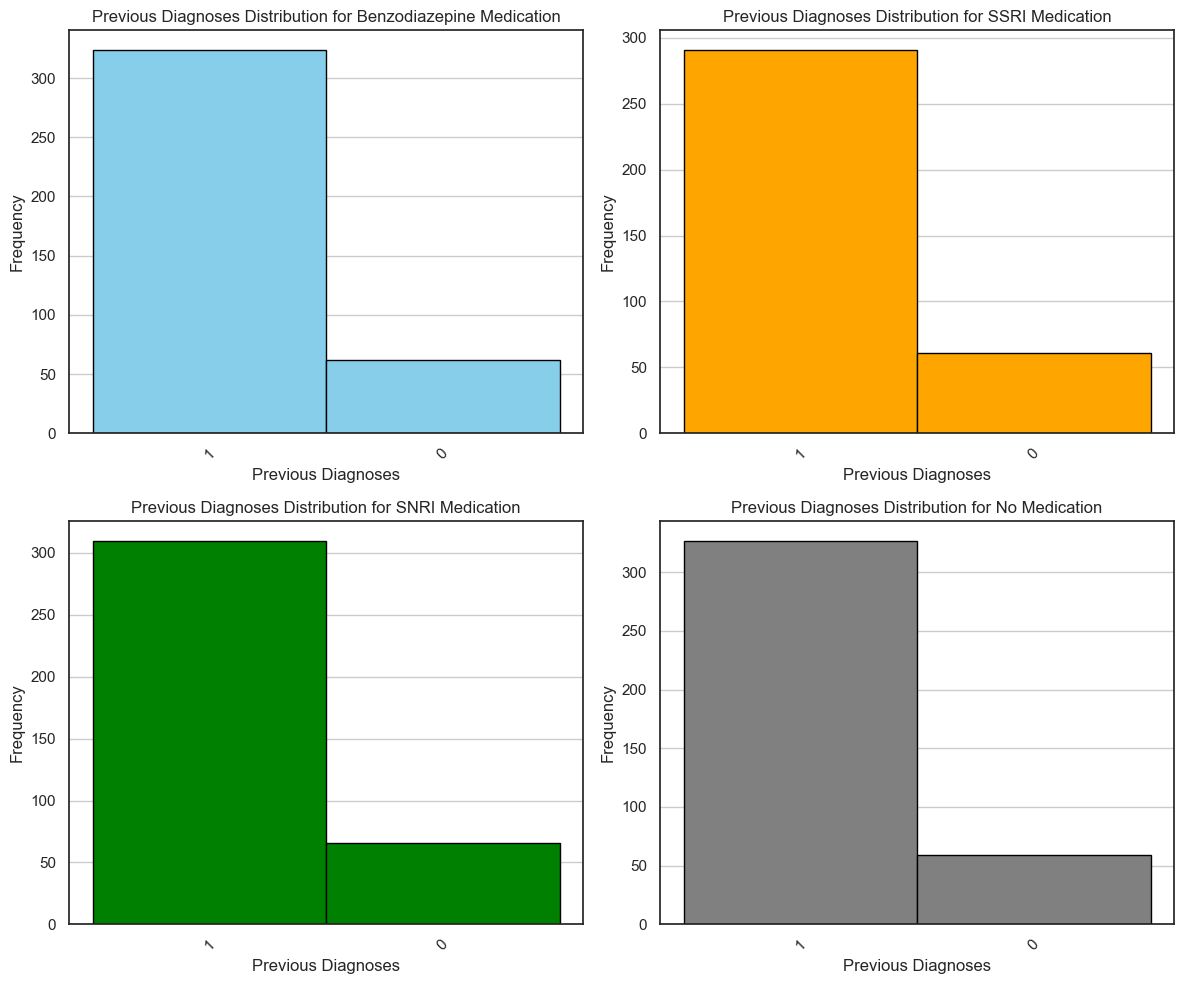

In [60]:
##**4. PREDISPOSITION FOR MEDICATION USE* - Previous Diagnoses (Yes or No)

# Get unique Previous Diagnoses from the entire dataset
prev_diagnoses = df['Previous Diagnoses (Yes or No)'].unique()

# Create a mapping of Previous Diagnoses to numerical values
prev_diagnoses_mapping = {diag: i for i, diag in enumerate(prev_diagnoses)}

# Map the 'Previous Diagnoses' column to numerical values for each medication type
benzo_prev_diag = benzo_data['Previous Diagnoses (Yes or No)'].map(prev_diagnoses_mapping)
ssri_prev_diag = ssri_data['Previous Diagnoses (Yes or No)'].map(prev_diagnoses_mapping)
snri_prev_diag = snri_data['Previous Diagnoses (Yes or No)'].map(prev_diagnoses_mapping)
none_prev_diag = none_data['Previous Diagnoses (Yes or No)'].map(prev_diagnoses_mapping)

# Create subplots for each medication type and none
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Plot histograms for each medication type and none
axs[0, 0].hist(benzo_prev_diag, bins=len(prev_diagnoses), color='skyblue', edgecolor='black', range=(-0.5, len(prev_diagnoses) - 0.5))
axs[0, 0].set_title('Previous Diagnoses Distribution for Benzodiazepine Medication')
axs[0, 0].set_xticks(range(len(prev_diagnoses)))
axs[0, 0].set_xticklabels(prev_diagnoses, rotation=45)

axs[0, 1].hist(ssri_prev_diag, bins=len(prev_diagnoses), color='orange', edgecolor='black', range=(-0.5, len(prev_diagnoses) - 0.5))
axs[0, 1].set_title('Previous Diagnoses Distribution for SSRI Medication')
axs[0, 1].set_xticks(range(len(prev_diagnoses)))
axs[0, 1].set_xticklabels(prev_diagnoses, rotation=45)

axs[1, 0].hist(snri_prev_diag, bins=len(prev_diagnoses), color='green', edgecolor='black', range=(-0.5, len(prev_diagnoses) - 0.5))
axs[1, 0].set_title('Previous Diagnoses Distribution for SNRI Medication')
axs[1, 0].set_xticks(range(len(prev_diagnoses)))
axs[1, 0].set_xticklabels(prev_diagnoses, rotation=45)

axs[1, 1].hist(none_prev_diag, bins=len(prev_diagnoses), color='gray', edgecolor='black', range=(-0.5, len(prev_diagnoses) - 0.5))
axs[1, 1].set_title('Previous Diagnoses Distribution for No Medication')
axs[1, 1].set_xticks(range(len(prev_diagnoses)))
axs[1, 1].set_xticklabels(prev_diagnoses, rotation=45)

# Setting common labels
for ax in axs.flat:
    ax.set_xlabel('Previous Diagnoses')
    ax.set_ylabel('Frequency')
    ax.grid(axis='y')

# Adjust layout for better display
plt.tight_layout()
plt.show()

In [61]:
##**4. PREDISPOSITION FOR MEDICATION USE* - Previous diagnose (Yes or No)

# Filter for cases with a previous diagnosis of MDD and excluding 'None' medication
filtered_df = df[(df['Previous Diagnoses (Yes or No)'] == 1) & (df['Medications'] != 'None')]

# Calculate the probability of being medicated for OCD given a previous diagnosis of MDD
probability_medicated_for_ocd = len(filtered_df) / len(df[(df['Previous Diagnoses (Yes or No)'] == 1)])

print(f"Probability of being medicated for OCD given a previous diagnosis of mental illness: {probability_medicated_for_ocd:.2f}")

Probability of being medicated for OCD given a previous diagnosis of mental illness: 0.74


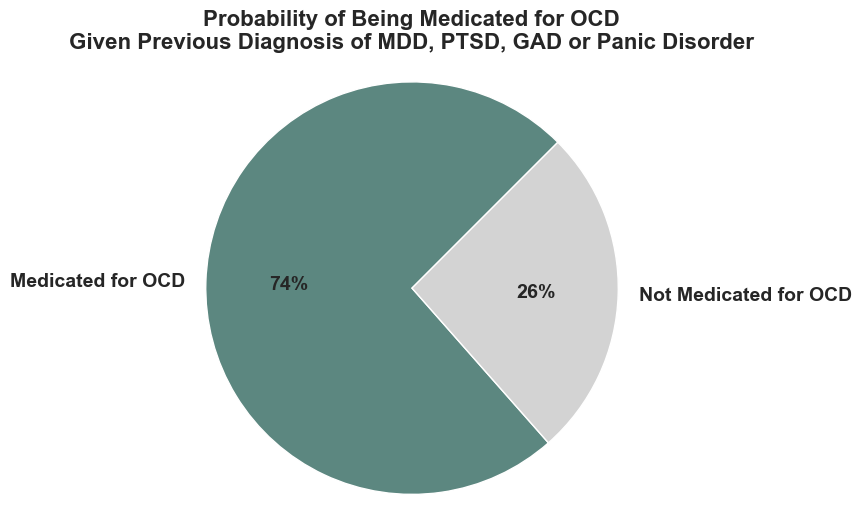

In [63]:
##**4. PREDISPOSITION FOR MEDICATION USE* - Previous diagnose mental disorder

# Probability calculated
probability_medicated_for_ocd = 0.74

# Create labels and sizes for the pie chart
labels = ['Medicated for OCD', 'Not Medicated for OCD']
sizes = [probability_medicated_for_ocd, 1 - probability_medicated_for_ocd]

# Create a pie chart with percentages displayed without decimal places and larger, bold labels
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%1.0f%%', colors=['#5C8780', 'lightgrey'], startangle=45, textprops={'fontsize': 14, 'fontweight': 'bold'})
plt.title('Probability of Being Medicated for OCD\nGiven Previous Diagnosis of MDD, PTSD, GAD or Panic Disorder', fontweight='bold', fontsize=16)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

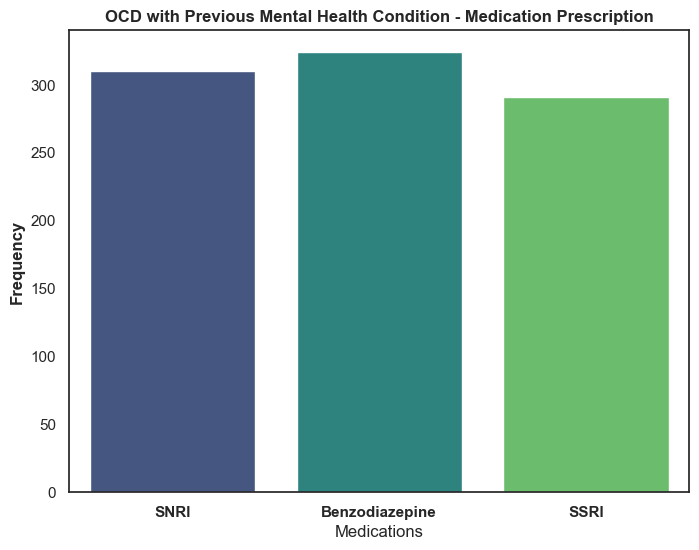

In [82]:
# Filter for Previous Diagnoses where medication value is not 'None'
diagnoses_medicated_cases = df[(df['Previous Diagnoses (Yes or No)'] == 1) & (df['Medications'] != 'None')]

# Plotting the distribution of MDD cases with non-'None' medication
plt.figure(figsize=(8, 6))
plot = sns.countplot(x='Medications', data=diagnoses_medicated_cases, palette='viridis')

# Set title and axis labels in bold
plt.title('OCD with Previous Mental Health Condition - Medication Prescription', fontweight='bold')
plt.xlabel('Medications', fontweight='regular')
plt.ylabel('Frequency', fontweight='bold')

# Center align x-axis labels with each bar
plot.set_xticklabels(plot.get_xticklabels(), rotation=0, horizontalalignment='center', fontweight='bold')

plt.show()

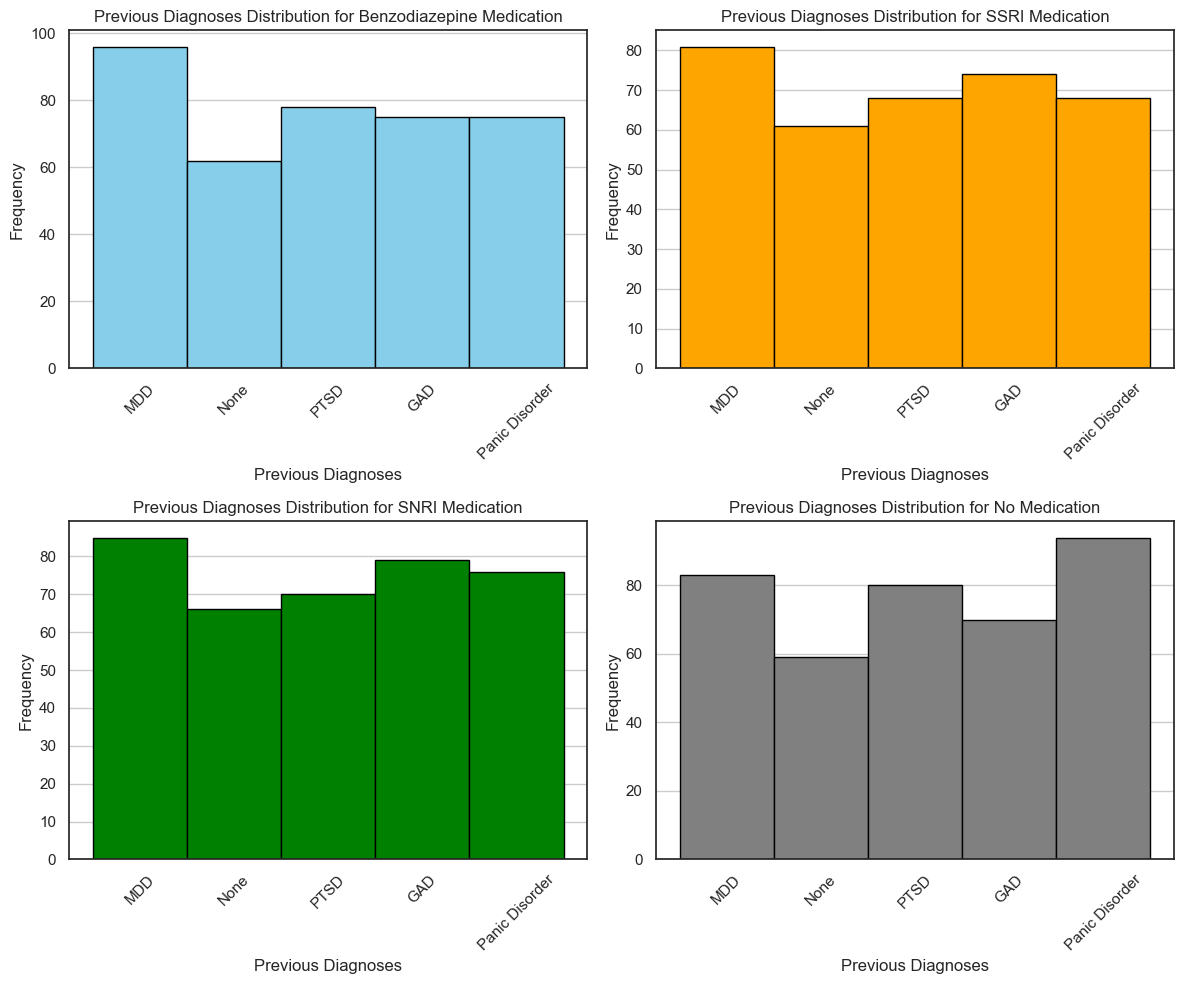

In [66]:
##**4. PREDISPOSITION FOR MEDICATION USE* - Previous Diagnoses

# Get unique Previous Diagnoses from the entire dataset
prev_diagnoses = df['Previous Diagnoses'].unique()

# Create a mapping of Previous Diagnoses to numerical values
prev_diagnoses_mapping = {diag: i for i, diag in enumerate(prev_diagnoses)}

# Map the 'Previous Diagnoses' column to numerical values for each medication type
benzo_prev_diag = benzo_data['Previous Diagnoses'].map(prev_diagnoses_mapping)
ssri_prev_diag = ssri_data['Previous Diagnoses'].map(prev_diagnoses_mapping)
snri_prev_diag = snri_data['Previous Diagnoses'].map(prev_diagnoses_mapping)
none_prev_diag = none_data['Previous Diagnoses'].map(prev_diagnoses_mapping)

# Create subplots for each medication type and none
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Plot histograms for each medication type and none
axs[0, 0].hist(benzo_prev_diag, bins=len(prev_diagnoses), color='skyblue', edgecolor='black', range=(-0.5, len(prev_diagnoses) - 0.5))
axs[0, 0].set_title('Previous Diagnoses Distribution for Benzodiazepine Medication')
axs[0, 0].set_xticks(range(len(prev_diagnoses)))
axs[0, 0].set_xticklabels(prev_diagnoses, rotation=45)

axs[0, 1].hist(ssri_prev_diag, bins=len(prev_diagnoses), color='orange', edgecolor='black', range=(-0.5, len(prev_diagnoses) - 0.5))
axs[0, 1].set_title('Previous Diagnoses Distribution for SSRI Medication')
axs[0, 1].set_xticks(range(len(prev_diagnoses)))
axs[0, 1].set_xticklabels(prev_diagnoses, rotation=45)

axs[1, 0].hist(snri_prev_diag, bins=len(prev_diagnoses), color='green', edgecolor='black', range=(-0.5, len(prev_diagnoses) - 0.5))
axs[1, 0].set_title('Previous Diagnoses Distribution for SNRI Medication')
axs[1, 0].set_xticks(range(len(prev_diagnoses)))
axs[1, 0].set_xticklabels(prev_diagnoses, rotation=45)

axs[1, 1].hist(none_prev_diag, bins=len(prev_diagnoses), color='gray', edgecolor='black', range=(-0.5, len(prev_diagnoses) - 0.5))
axs[1, 1].set_title('Previous Diagnoses Distribution for No Medication')
axs[1, 1].set_xticks(range(len(prev_diagnoses)))
axs[1, 1].set_xticklabels(prev_diagnoses, rotation=45)

# Setting common labels
for ax in axs.flat:
    ax.set_xlabel('Previous Diagnoses')
    ax.set_ylabel('Frequency')
    ax.grid(axis='y')

# Adjust layout for better display
plt.tight_layout()
plt.show()


In [67]:
##**4. PREDISPOSITION FOR MEDICATION USE* - MDD Previous diagnose

# Filter for cases with a previous diagnosis of MDD and excluding 'None' medication
filtered_df = df[(df['Previous Diagnoses'] == 'MDD') & (df['Medications'] != 'None')]

# Calculate the probability of being medicated for OCD given a previous diagnosis of MDD
probability_medicated_for_ocd = len(filtered_df) / len(df[(df['Previous Diagnoses'] == 'MDD')])

print(f"Probability of being medicated for OCD given a previous diagnosis of MDD: {probability_medicated_for_ocd:.2f}")


Probability of being medicated for OCD given a previous diagnosis of MDD: 0.76


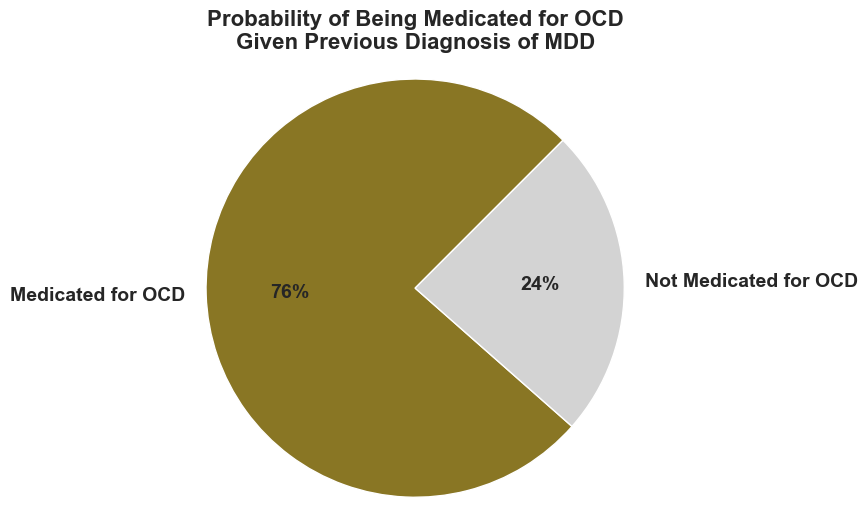

In [68]:
##**4. PREDISPOSITION FOR MEDICATION USE* - MDD Previous diagnose

# Probability calculated
probability_medicated_for_ocd = 0.76

# Create labels and sizes for the pie chart
labels = ['Medicated for OCD', 'Not Medicated for OCD']
sizes = [probability_medicated_for_ocd, 1 - probability_medicated_for_ocd]

# Create a pie chart with percentages displayed without decimal places and larger, bold labels
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%1.0f%%', colors=['#897624', 'lightgrey'], startangle=45, textprops={'fontsize': 14, 'fontweight': 'bold'})
plt.title('Probability of Being Medicated for OCD\nGiven Previous Diagnosis of MDD', fontweight='bold', fontsize=16)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()



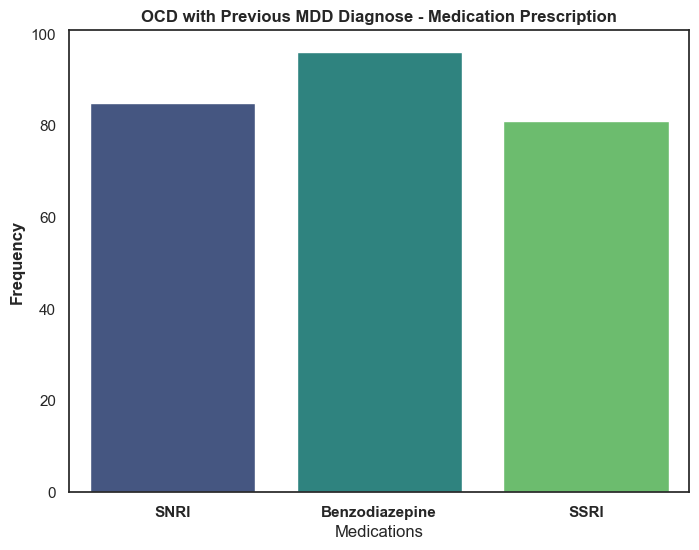

In [81]:
# Filter for MDD cases where medication value is not 'None'
mdd_non_none_medication_cases = df[(df['Previous Diagnoses'] == 'MDD') & (df['Medications'] != 'None')]

# Plotting the distribution of MDD cases with non-'None' medication
plt.figure(figsize=(8, 6))
plot = sns.countplot(x='Medications', data=mdd_non_none_medication_cases, palette='viridis')

# Set title and axis labels in bold
plt.title('OCD with Previous MDD Diagnose - Medication Prescription', fontweight='bold')
plt.xlabel('Medications', fontweight='regular')
plt.ylabel('Frequency', fontweight='bold')

# Center align x-axis labels with each bar
plot.set_xticklabels(plot.get_xticklabels(), rotation=0, horizontalalignment='center', fontweight='bold')

plt.show()



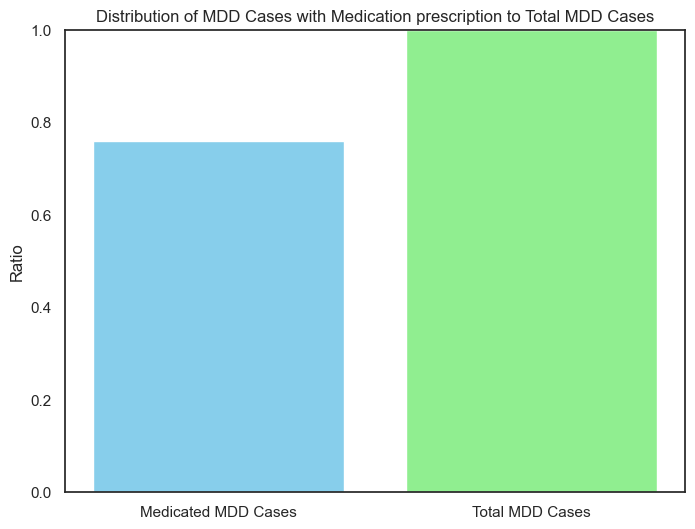

In [71]:
##**4. PREDISPOSITION FOR MEDICATION USE* - MDD Previous diagnose

# Filter for cases with previous diagnosis of MDD
mdd_diagnosed_cases = df[df['Previous Diagnoses'] == 'MDD']

# Calculate the total number of MDD cases
total_mdd_cases = len(mdd_diagnosed_cases)

# Filter MDD cases where medication value is not 'None'
mdd_non_none_medication_cases = mdd_diagnosed_cases[mdd_diagnosed_cases['Medications'] != 'None']

# Calculate the number of MDD cases where medication value is not 'None'
mdd_non_none_medication_count = len(mdd_non_none_medication_cases)

# Calculate the ratio of MDD cases with non-'None' medication to total MDD cases
ratio_non_none_medication = mdd_non_none_medication_count / total_mdd_cases

# Plotting the distribution
plt.figure(figsize=(8, 6))
plt.bar(['Medicated MDD Cases', 'Total MDD Cases'], [ratio_non_none_medication, 1], color=['skyblue', 'lightgreen'])
plt.title('Distribution of MDD Cases with Medication prescription to Total MDD Cases')
plt.ylabel('Ratio')
plt.ylim(0, 1)  # Set y-axis limits between 0 and 1 for ratio range
plt.show()


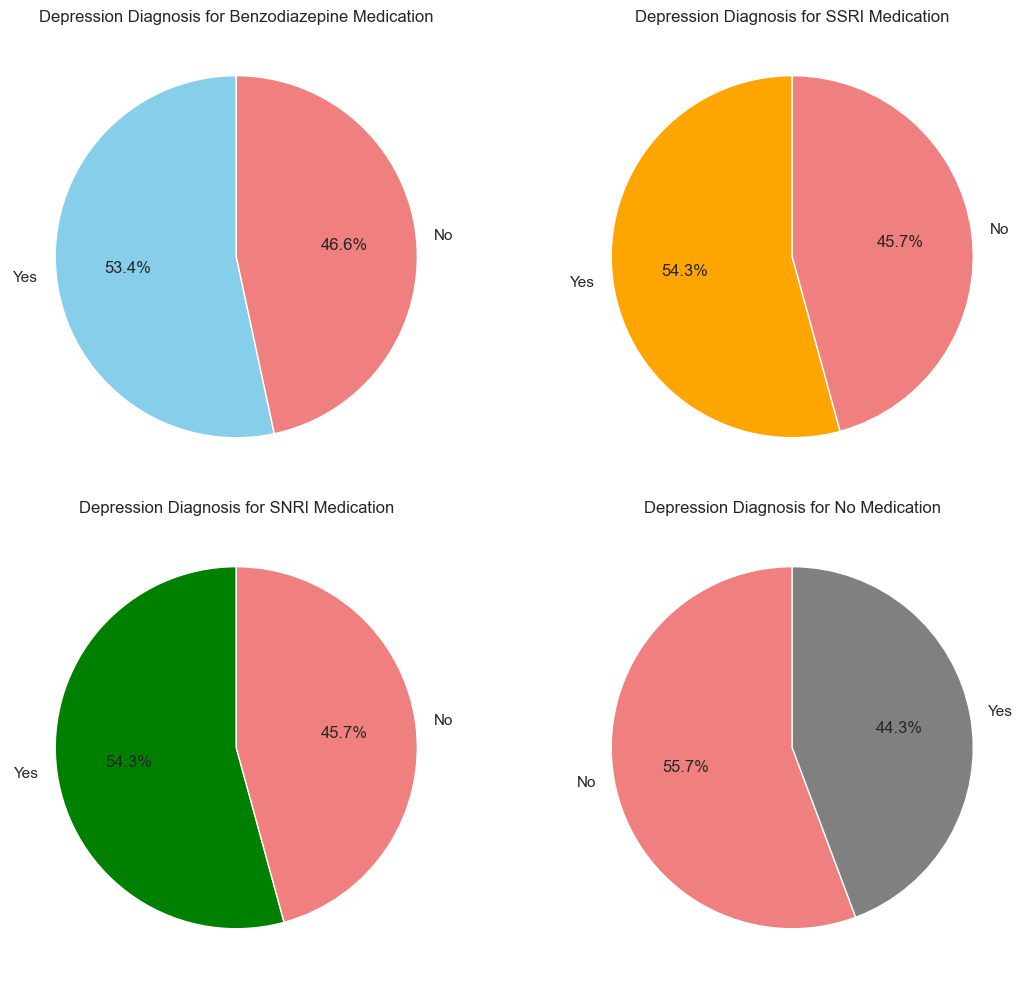

In [72]:
##**4. PREDISPOSITION FOR MEDICATION USE* - Depression Diagnosis

# Replace 1 with 'Yes' and 0 with 'No' for 'Depression Diagnosis' column
benzo_depression = benzo_data['Depression Diagnosis'].replace({1: 'Yes', 0: 'No'}).value_counts()
ssri_depression = ssri_data['Depression Diagnosis'].replace({1: 'Yes', 0: 'No'}).value_counts()
snri_depression = snri_data['Depression Diagnosis'].replace({1: 'Yes', 0: 'No'}).value_counts()
none_depression = none_data['Depression Diagnosis'].replace({1: 'Yes', 0: 'No'}).value_counts()

# Set a consistent color for "No" values
no_color = 'lightcoral'

# Creating subplots for each medication type and none using a pie chart
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Plotting pie charts for each medication type and none
axs[0, 0].pie(benzo_depression, labels=benzo_depression.index, autopct='%1.1f%%', colors=['skyblue', no_color], startangle=90)
axs[0, 0].set_title('Depression Diagnosis for Benzodiazepine Medication')

axs[0, 1].pie(ssri_depression, labels=ssri_depression.index, autopct='%1.1f%%', colors=['orange', no_color], startangle=90)
axs[0, 1].set_title('Depression Diagnosis for SSRI Medication')

axs[1, 0].pie(snri_depression, labels=snri_depression.index, autopct='%1.1f%%', colors=['green', no_color], startangle=90)
axs[1, 0].set_title('Depression Diagnosis for SNRI Medication')

axs[1, 1].pie(none_depression, labels=none_depression.index, autopct='%1.1f%%', colors=[no_color, 'gray'], startangle=90)
axs[1, 1].set_title('Depression Diagnosis for No Medication')

# Adjust layout for better display
plt.tight_layout()
plt.show()

In [73]:
##**4. PREDISPOSITION FOR MEDICATION USE* - Depression Diagnosis

# Filter for cases with a previous diagnosis of MDD and excluding 'None' medication
filtered_df_depression = df[(df['Depression Diagnosis'] == 1) & (df['Medications'] != 'None')]

# Calculate the probability of being medicated for OCD given a previous diagnosis of MDD
probability_medicated_for_ocd_depression = len(filtered_df_depression) / len(df[df['Depression Diagnosis'] == 1])

print(f"Probability of being medicated for OCD given an existent depression diagnosis: {probability_medicated_for_ocd:.2f}")

Probability of being medicated for OCD given an existent depression diagnosis: 0.76


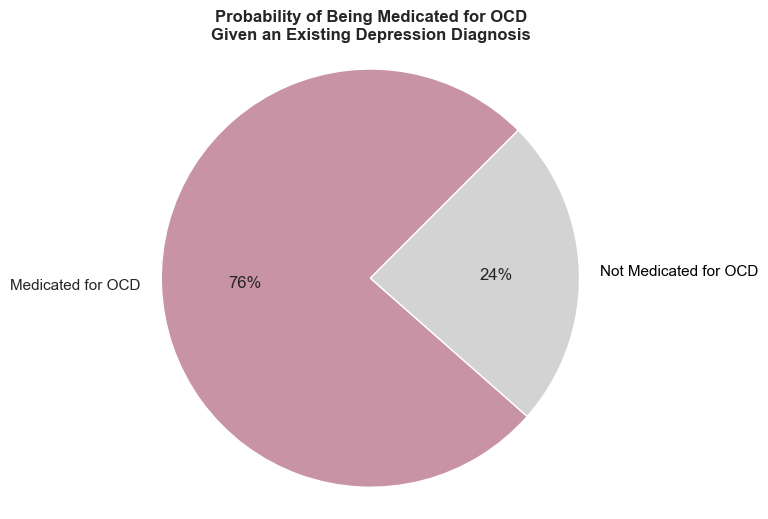

In [75]:
##**4. PREDISPOSITION FOR MEDICATION USE* - Depression Diagnosis

# Probability calculated
probability_medicated_for_ocd_depression = 0.76

# Create labels and sizes for the pie chart
labels = ['Medicated for OCD', 'Not Medicated for OCD']
sizes = [probability_medicated_for_ocd_depression, 1 - probability_medicated_for_ocd_depression]

# Define a color that meets the criteria
custom_color = '#C893A5'  # This is a shade of brown

# Create a pie chart with customized parameters
plt.figure(figsize=(8, 6))
wedges, texts, _ = plt.pie(sizes, labels=labels, autopct='%1.0f%%', startangle=45,
                           colors=[custom_color, 'lightgrey'])
plt.title('Probability of Being Medicated for OCD\nGiven an Existing Depression Diagnosis', fontweight='bold')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

# Change the text color of the 'Not Medicated for OCD' slice
texts[1].set_color('black')

plt.show()


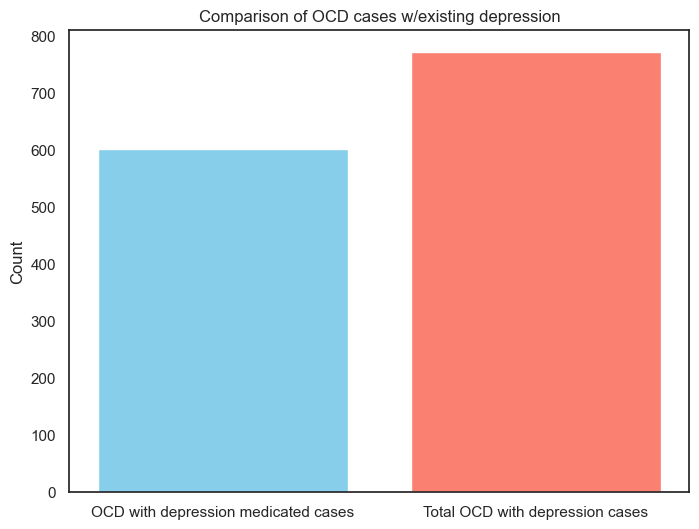

In [83]:
##**4. PREDISPOSITION FOR MEDICATION USE* - Depression Diagnosis

# Filter for cases where Depression is '1' and medication value is not 'None'
depression_medicated_cases = df[(df['Depression Diagnosis'] == 1) & (df['Medications'] != 'None')]

# Count of cases where Depression is '1' and medication value is not 'None'
count_depression_medicated_cases = len(depression_medicated_cases)

# Count of total cases where Depression is '1'
count_total_depression_cases = len(df[df['Depression Diagnosis'] == 1])

# Creating a bar plot
plt.figure(figsize=(8, 6))
plt.bar(['OCD with depression medicated cases', 'Total OCD with depression cases'], [count_depression_medicated_cases, count_total_depression_cases], color=['skyblue', 'salmon'])
plt.title('Comparison of OCD cases w/existing depression')
plt.ylabel('Count')
plt.show()


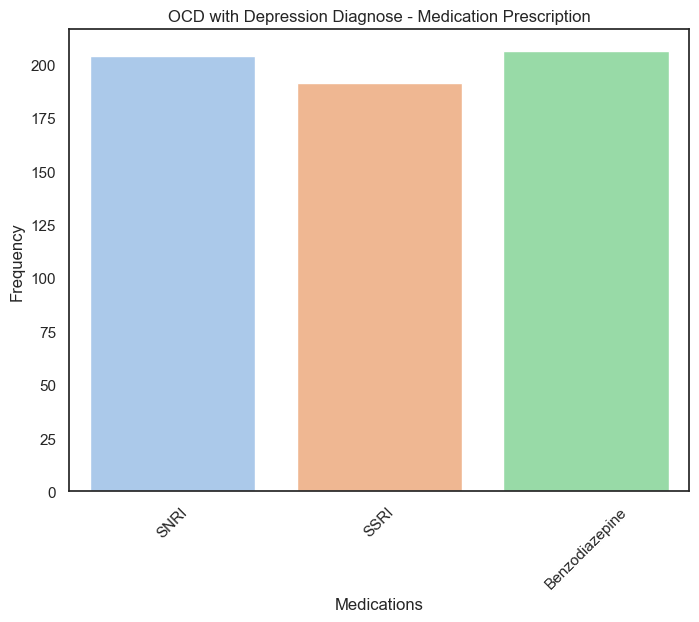

In [84]:
##**4. PREDISPOSITION FOR MEDICATION USE* - Depression Diagnosis

# Filter for cases where Depression is '1' and medication value is not 'None'
depression_medicated_cases = df[(df['Depression Diagnosis'] == 1) & (df['Medications'] != 'None')]

# Plotting the distribution using a countplot
plt.figure(figsize=(8, 6))
sns.countplot(x='Medications', data=depression_medicated_cases, palette='pastel')
plt.title('OCD with Depression Diagnose - Medication Prescription')
plt.xlabel('Medications')
plt.ylabel('Frequency')
plt.xticks(rotation=45)  # Rotate x-labels for better readability
plt.show()


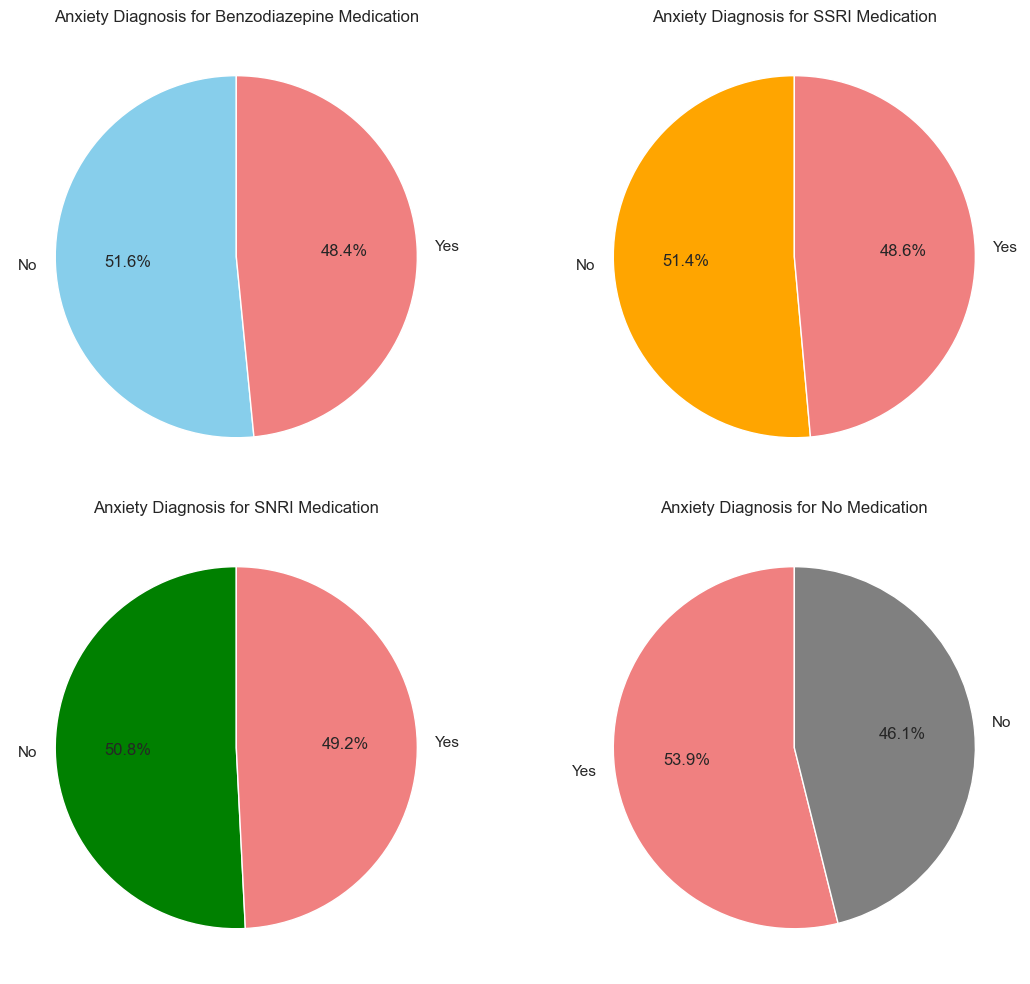

In [85]:
##**4. PREDISPOSITION FOR MEDICATION USE* - Anxiety Diagnosis

# Replace 1 with 'Yes' and 0 with 'No' for 'Anxiety Diagnosis' column
benzo_anxiety = benzo_data['Anxiety Diagnosis'].replace({1: 'Yes', 0: 'No'}).value_counts()
ssri_anxiety = ssri_data['Anxiety Diagnosis'].replace({1: 'Yes', 0: 'No'}).value_counts()
snri_anxiety = snri_data['Anxiety Diagnosis'].replace({1: 'Yes', 0: 'No'}).value_counts()
none_anxiety = none_data['Anxiety Diagnosis'].replace({1: 'Yes', 0: 'No'}).value_counts()

# Set a consistent color for "No" values
no_color = 'lightcoral'

# Creating subplots for each medication type and none using a pie chart
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Plotting pie charts for each medication type and none
axs[0, 0].pie(benzo_anxiety, labels=benzo_anxiety.index, autopct='%1.1f%%', colors=['skyblue', no_color], startangle=90)
axs[0, 0].set_title('Anxiety Diagnosis for Benzodiazepine Medication')

axs[0, 1].pie(ssri_anxiety, labels=ssri_anxiety.index, autopct='%1.1f%%', colors=['orange', no_color], startangle=90)
axs[0, 1].set_title('Anxiety Diagnosis for SSRI Medication')

axs[1, 0].pie(snri_anxiety, labels=snri_anxiety.index, autopct='%1.1f%%', colors=['green', no_color], startangle=90)
axs[1, 0].set_title('Anxiety Diagnosis for SNRI Medication')

axs[1, 1].pie(none_anxiety, labels=none_anxiety.index, autopct='%1.1f%%', colors=[no_color, 'gray'], startangle=90)
axs[1, 1].set_title('Anxiety Diagnosis for No Medication')

# Adjust layout for better display
plt.tight_layout()
plt.show()


In [86]:
#An important factor influencing the need for medication in OCD cases is the previous diagnosis of other mental health conditions 
#such as MDD (Major Depressive Disorder), PTSD (Post-Traumatic Stress Disorder), GAD (Generalized Anxiety Disorder), or Panic Disorder. 
#Most notably, depression disorders play a significant role.

In [87]:
df.to_csv('final_project_clean_2.csv', index=True)

In [ ]:
#WHAT'SNEXT?
#To complete the analysis, it will be necessary to  explore
#Market Acceptance Potential: Treatment response, reported effectiveness, adverse effects, patient feedback and long-term efficacy.
#Cost and Insurance Coverage: Investigate the cost and insurance coverage, and assess if there's a gap in terms of affordability or coverage in different demographic and socioeconomic groups.
#Economic Burden Analysis: Healthcare Expenditure: Evaluate OCD treatment costs for healthcare systems, seeking cost-saving medication solutions.

In [ ]:
#LINK TO PRESENTATION: https://www.behance.net/gallery/188692477/Data-Analytics-Project-OCD-Medications